## Scaling law plot for tie-break and reordering based on chemical formula
We can use the chemical formula for reordering only tiebreaks or to reorder all top5.

In [2]:
# additional packages
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import argparse
import os
import time
import glob
from tqdm import tqdm
import scipy
import seaborn as sns
import pickle
from collections import Counter
import matplotlib.font_manager as fm
import sys
USER = os.getenv('USER')
sys.path.append(F'/home/{USER}/CODE/Pytorch-fingerprints/')
from utils.screening import tanimoto_numpy, fp_screening_function

print('Packages loaded')

Packages loaded


In [2]:
#data
data_path = f'/home/{USER}/QUAM-AFM/datasets/285k_train_15k_fp_and_atom_counts_w_H.gz'
dataset_df = pd.read_pickle(data_path)

#data
#data_path = f'/home/{USER}/QUAM-AFM/datasets/atoms_count_w_H_df.gz'
#atom_count_df = pd.read_pickle(data_path)

### With tiebreak reordering

In [1]:
data_path = f'/home/{USER}/CODE/Pytorch-fingerprints/calculations/scaling_law_chemical_formula/acc_scaling_law_top10.pickle'

with open(data_path, 'rb') as handle:
    acc_scaling_law = pickle.load(handle)

NameError: name 'USER' is not defined

In [4]:
dataset_df

,path,CID,SMILES,morgan_fp,split,corrugation,C,Br,Cl,F,I,N,O,P,S,H
1,/scratch/dataset/quam/K-1/Conformer3D_CID_1000...,10001048,C1=CC=C2C=C3C(=CC2=C1)NC(=N3)C4=CC5=C(C=C4)N=C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,1.1767,25.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,16.0
7,/scratch/dataset/quam/K-1/Conformer3D_CID_1000...,10005,C(#N)N=C(N)N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0002,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0
14,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100128716,CC1=C(C2=NC(=CC(=C2C=C1)NCCCN)C)C,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0110,15.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,21.0
15,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100175925,COC(=O)CSC1=NN=C(S1)NC(=O)C2=CC=CO2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0530,10.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,2.0,9.0
16,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100197007,COC(=O)CSC1=NN=C(S1)NC(=O)C2=CC3=C(O2)C=CC4=CC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0856,18.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579897,/scratch/dataset/quam/K-1/Conformer3D_CID_1376...,13762891,C1=CC(=CC=C1C(=O)CCC(=O)C2=CC=C(C=C2)[N+](=O)[...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.1397,16.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,12.0
579900,/scratch/dataset/quam/K-1/Conformer3D_CID_3410...,341027,C1OC2=C(O1)C(=O)C3=C(C2=O)C=CC(=C3)O,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0035,11.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0
579902,/scratch/dataset/quam/K-1/Conformer3D_CID_5392...,53921077,C1=CC(=CC=C1C=N)N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0008,7.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0
579903,/scratch/dataset/quam/K-1/Conformer3D_CID_8238...,82382131,CC1=C2C=C(NC2=CC=C1)C3=NN=CC(=C3)C(=O)O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0034,14.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,11.0


In [6]:
test_df = dataset_df[dataset_df['split'] == 'test']
N_SAMPLES = 15000


<AxesSubplot:xlabel='corrugation', ylabel='Count'>

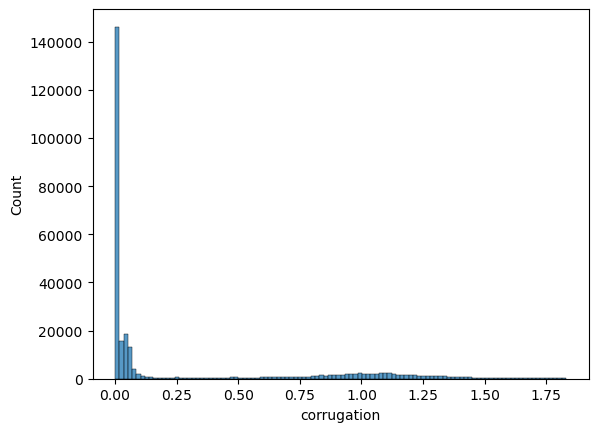

In [7]:
sns.histplot(test_df['corrugation'])

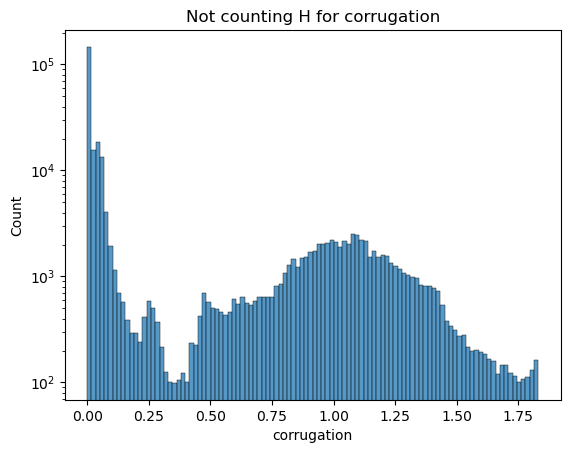

In [8]:
data = test_df['corrugation']
# Create histogram plot
ax = sns.histplot(data, kde=False)

# Set log scale for y-axis
ax.set_yscale('log')
plt.title('Not counting H for corrugation')
# Show the plot
plt.show()

In [9]:
def categorize_corr(corr):
    '''Convert corrugation (float) into a class'''
    corr = float(corr)
    assert (corr >= 0)
    if corr < 0.25:
        cat = 0
    elif corr < 0.75:
        cat = 1
    elif corr < 1.25:
        cat = 2
    else:
        cat = 3
    return cat

In [15]:
test_df['corr_cat'] = [categorize_corr(x) for x in test_df['corrugation']]
Counter(test_df['corr_cat'])

Counter({2: 49157, 0: 203887, 1: 12175, 3: 14629})

In [16]:
test_df

,path,CID,SMILES,morgan_fp,split,corrugation,C,Br,Cl,F,I,N,O,P,S,H,corr_cat
1,/scratch/dataset/quam/K-1/Conformer3D_CID_1000...,10001048,C1=CC=C2C=C3C(=CC2=C1)NC(=N3)C4=CC5=C(C=C4)N=C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,1.1767,25.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,16.0,2
7,/scratch/dataset/quam/K-1/Conformer3D_CID_1000...,10005,C(#N)N=C(N)N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0002,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0
14,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100128716,CC1=C(C2=NC(=CC(=C2C=C1)NCCCN)C)C,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0110,15.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,21.0,0
15,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100175925,COC(=O)CSC1=NN=C(S1)NC(=O)C2=CC=CO2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0530,10.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,2.0,9.0,0
16,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100197007,COC(=O)CSC1=NN=C(S1)NC(=O)C2=CC3=C(O2)C=CC4=CC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0856,18.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,2.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579897,/scratch/dataset/quam/K-1/Conformer3D_CID_1376...,13762891,C1=CC(=CC=C1C(=O)CCC(=O)C2=CC=C(C=C2)[N+](=O)[...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.1397,16.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,12.0,0
579900,/scratch/dataset/quam/K-1/Conformer3D_CID_3410...,341027,C1OC2=C(O1)C(=O)C3=C(C2=O)C=CC(=C3)O,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0035,11.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0,0
579902,/scratch/dataset/quam/K-1/Conformer3D_CID_5392...,53921077,C1=CC(=CC=C1C=N)N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0008,7.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,0
579903,/scratch/dataset/quam/K-1/Conformer3D_CID_8238...,82382131,CC1=C2C=C(NC2=CC=C1)C3=NN=CC(=C3)C(=O)O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0034,14.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,11.0,0


## Scale law figure

In [17]:
ref_sizes = list(acc_scaling_law.keys())
print(acc_scaling_law[np.max(ref_sizes)].keys())
acc_scaling_law[ref_sizes[0]]['top_1_mistakes']

dict_keys(['top_1_mistakes', 'top_5_mistakes', 'top_1_mistakes_reorder', 'top_5_mistakes_reorder'])


[129712445,
 59383542,
 59383547,
 59390182,
 100822,
 101725283,
 102393,
 123683583,
 60134116,
 138831,
 58830918,
 58830949,
 13000274,
 13000286,
 123350949,
 136762336,
 12761319,
 12761330,
 12761531,
 85669101,
 123044,
 123908185,
 123911932,
 123912520,
 54300247,
 543014,
 134982501,
 134982825,
 134983592,
 22448215,
 123473743,
 123475825,
 129671794,
 13766956,
 13766965,
 13766967,
 129829073,
 129829432,
 129829435,
 23592500,
 59854140,
 59854142,
 59854147,
 123757801,
 59645563,
 58774645,
 85985737,
 85986644,
 85988850,
 85989461,
 124034542,
 71750269,
 54097614,
 54098412,
 126650924,
 135897203,
 135899568,
 129645177,
 129774538,
 22087375,
 134867626,
 59270990,
 129868456,
 130475637,
 59741931,
 23523247,
 58656424,
 12340268,
 123967434,
 59787205,
 59787225,
 59787227,
 59787233,
 59787244,
 123284874,
 123285067,
 13766984,
 85807103,
 71333029,
 71333463,
 71334116,
 18310,
 183178,
 564910,
 2751855,
 123147429,
 167605,
 167874,
 6431039,
 6431860,
 91

In [18]:
for i, ref_size in enumerate(ref_sizes):
    print(i, ref_size)

0 275422
1 199327
2 144255
3 104399
4 75555
5 54680
6 39573
7 28639
8 20726
9 15000


In [19]:
def top_acc(acc_scaling_law, n_samples):
    '''Extracts reference dataset sizes and computes top1 and top5 acc
    from acc_scaling_law dict.
    ARGS: acc_scaling_law: dictionary containing the CID for which the identification fails
          n_samples: number of samples to identify'''
    ref_sizes = list(acc_scaling_law.keys())
    top_1_acc = np.zeros(len(ref_sizes))
    top_5_acc = np.zeros(len(ref_sizes))
    for i, ref_size in enumerate(ref_sizes):
        top_1_acc[i] =  len(acc_scaling_law[ref_size]['top_1_mistakes'])
        top_5_acc[i] =  len(acc_scaling_law[ref_size]['top_5_mistakes'])
    
    top_1_acc = (1 - top_1_acc/n_samples)*100
    top_5_acc = (1 - top_5_acc/n_samples)*100

    return ref_sizes, top_1_acc, top_5_acc
        

    
    

In [20]:
ref_sizes, top_1_acc, top_5_acc = top_acc(acc_scaling_law, N_SAMPLES)
print(ref_sizes, top_1_acc, top_5_acc)

[275422, 199327, 144255, 104399, 75555, 54680, 39573, 28639, 20726, 15000] [91.46666667 91.52       91.67333333 91.83333333 92.58666667 93.12666667
 93.68       94.05333333 94.4        94.82      ] [95.76       95.79333333 95.88666667 96.02       96.48       96.74666667
 96.94       97.1        97.28       97.5       ]


In [48]:
def top_acc_w_tie(acc_scaling_law, n_samples):
    '''Extracts reference dataset sizes and computes top1, top1_w_tiebreak and top5 acc
    from acc_scaling_law dict.
    ARGS: acc_scaling_law: dictionary containing the CID for which the identification fails
          n_samples: number of samples to identify'''
    ref_sizes = list(acc_scaling_law.keys())
    top_1_acc = np.zeros(len(ref_sizes))
    top_1_acc_w_tiebreak = np.zeros(len(ref_sizes))
    top_5_acc = np.zeros(len(ref_sizes))
    
    for i, ref_size in enumerate(ref_sizes):
        top_1_acc[i] =  len(acc_scaling_law[ref_size]['top_1_mistakes'])
        top_1_acc_w_tiebreak[i] =  len(acc_scaling_law[ref_size]['top_1_mistakes_tie'])
        top_5_acc[i] =  len(acc_scaling_law[ref_size]['top_5_mistakes'])
    
    top_1_acc = (1 - top_1_acc/n_samples)*100
    top_1_acc_w_tiebreak = (1 - top_1_acc_w_tiebreak/n_samples)*100
    top_5_acc = (1 - top_5_acc/n_samples)*100

    return ref_sizes, top_1_acc, top_1_acc_w_tiebreak, top_5_acc

In [49]:
ref_sizes, top_1_acc, top_1_acc_w_tiebreak, top_5_acc =  top_acc_w_tie(acc_scaling_law, N_SAMPLES)
print(ref_sizes, top_1_acc, top_1_acc_w_tiebreak, top_5_acc )

KeyError: 'top_1_mistakes_tie'

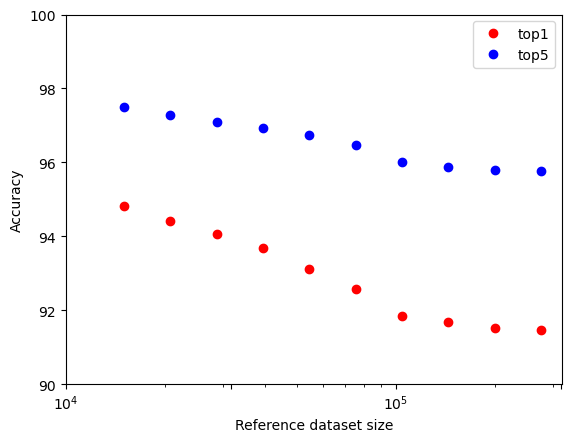

In [23]:

# Create a figure and two subplots
fig, ax1 = plt.subplots()


# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', 'top5'])
ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

ax1.set_xticks(x_ticks)


# Display the plot
plt.show()

NameError: name 'top_1_acc_w_tiebreak' is not defined

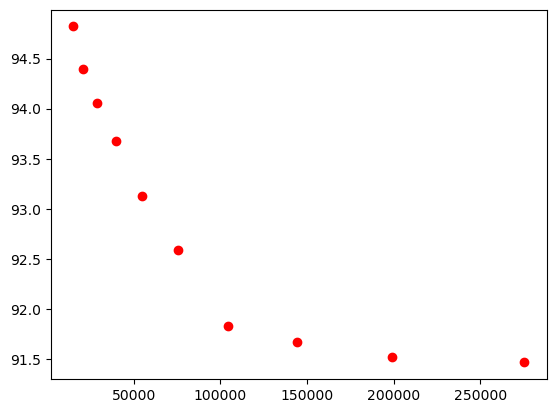

In [24]:
# Create a figure and two subplots
fig, ax1 = plt.subplots()


# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(ref_sizes, top_1_acc_w_tiebreak, 'go')
ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', 'top1 with tiebreak', 'top5'])
ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

ax1.set_xticks(x_ticks)


# Display the plot
plt.show()

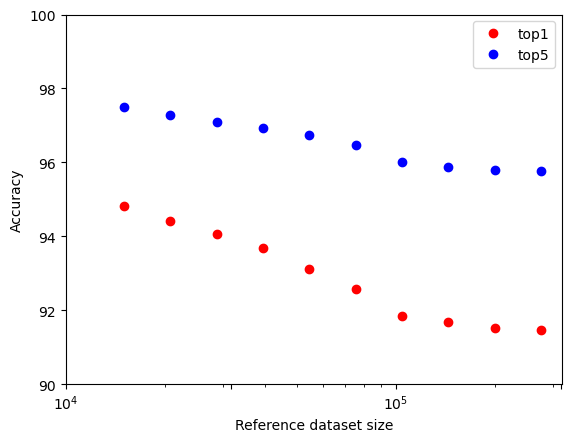

In [25]:

# Create a figure and two subplots
fig, ax1 = plt.subplots()


# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', 'top5'])
ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

ax1.set_xticks(x_ticks)


# Display the plot
plt.show()

In [26]:
x_ticks = 10**np.asarray([4,4.5, 5, 5.5, 6])
x_ticks

array([  10000.        ,   31622.77660168,  100000.        ,
        316227.76601684, 1000000.        ])

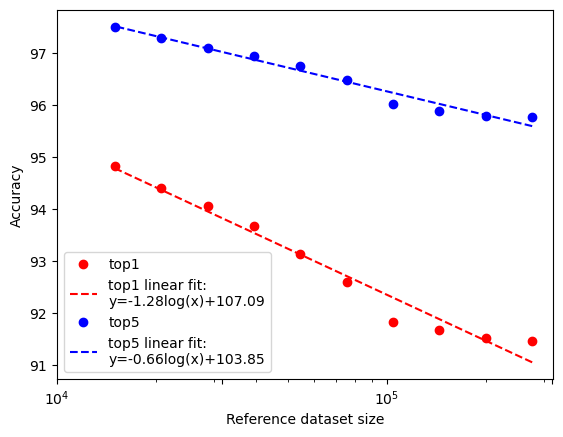

In [27]:

# Calculate linear regression for top 1 accuracy
coef1, interp1 = np.polyfit(np.log(ref_sizes), top_1_acc, 1)
poly1 = np.poly1d(coef1)
x1 = ref_sizes

# Calculate linear regression for top 5 accuracy
coef5, interp5 = np.polyfit(np.log(ref_sizes), top_5_acc, 1)
poly5 = np.poly1d(coef5)
x5 = ref_sizes

# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(x1, np.log(ref_sizes)*coef1+interp1, 'r--')
ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.plot(x5, np.log(ref_sizes)*coef5+interp5, 'b--')
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', f'top1 linear fit:\ny={coef1:.2f}log(x)+{interp1:.2f}', 
            'top5', f'top5 linear fit:\ny={coef5:.2f}log(x)+{interp5:.2f}'])
#ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

ax1.set_xticks(x_ticks)
# Display the plot
plt.show()

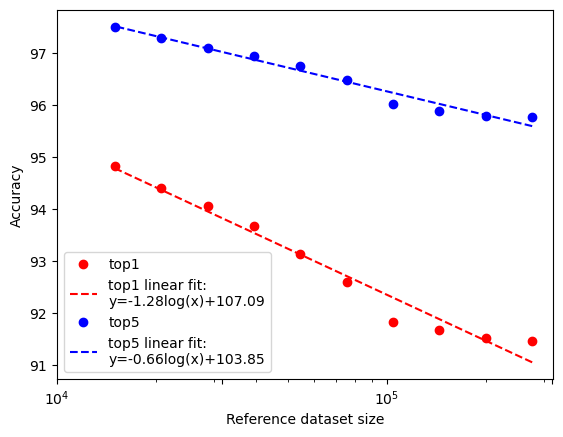

In [28]:

# Calculate linear regression for top 1 accuracy
coef1, interp1 = np.polyfit(np.log(ref_sizes), top_1_acc, 1)
poly1 = np.poly1d(coef1)
x1 = ref_sizes

# Calculate linear regression for top 5 accuracy
coef5, interp5 = np.polyfit(np.log(ref_sizes), top_5_acc, 1)
poly5 = np.poly1d(coef5)
x5 = ref_sizes

# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(x1, np.log(ref_sizes)*coef1+interp1, 'r--')
ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.plot(x5, np.log(ref_sizes)*coef5+interp5, 'b--')
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', f'top1 linear fit:\ny={coef1:.2f}log(x)+{interp1:.2f}', 
            'top5', f'top5 linear fit:\ny={coef5:.2f}log(x)+{interp5:.2f}'])
#ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

ax1.set_xticks(x_ticks)
# Display the plot
plt.show()

In [29]:
# Calculate linear regression for top 1 accuracy
coef1, interp1 = np.polyfit(np.log(ref_sizes), top_1_acc, 1)
coef1_t, interp1_t = np.polyfit(np.log(ref_sizes), top_1_acc_w_tiebreak, 1)


poly1 = np.poly1d(coef1)
x1 = ref_sizes

# Calculate linear regression for top 5 accuracy
coef5, interp5 = np.polyfit(np.log(ref_sizes), top_5_acc, 1)
poly5 = np.poly1d(coef5)
x5 = ref_sizes

# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(x1, np.log(ref_sizes)*coef1+interp1, 'r--')
ax1.plot(ref_sizes, top_1_acc_w_tiebreak, 'go')
ax1.plot(x1, np.log(ref_sizes)*coef1_t+interp1_t, 'g--')

ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.plot(x5, np.log(ref_sizes)*coef5+interp5, 'b--')
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', f'top1 linear fit:\ny={coef1:.2f}log(x)+{interp1:.2f}',
            'top1 w tiebreak', f'top1 w tiebreak linear fit:\ny={coef1_t:.2f}log(x)+{interp1_t:.2f}',
            'top5', f'top5 linear fit:\ny={coef5:.2f}log(x)+{interp5:.2f}'],
          bbox_to_anchor=(1., 1.05))
#ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

x_ticks = np.array([1e4, 2e4, 5e4, 1e5, 2e5])

ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks.astype(int), fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_acc_reference_size.pdf', format="pdf", bbox_inches="tight")

# Display the plot
plt.show()

NameError: name 'top_1_acc_w_tiebreak' is not defined

In [30]:
np.log(ref_sizes)/np.log(10)

array([5.43999863, 5.29956613, 5.15913088, 5.01869634, 4.87826321,
       4.73782851, 4.59739898, 4.45695785, 4.31651549, 4.17609126])

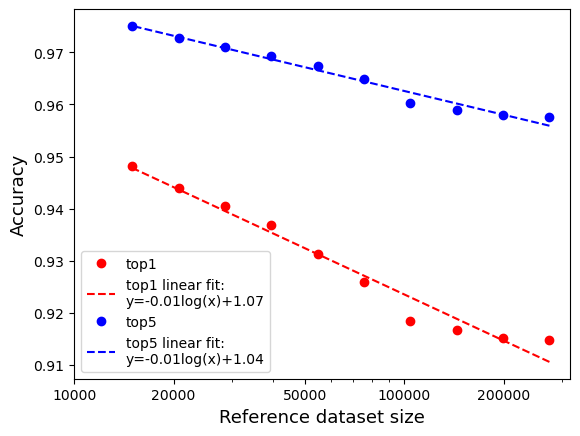

In [31]:


# Calculate linear regression for top 1 accuracy
coef1, interp1 = np.polyfit(np.log(ref_sizes), top_1_acc/100, 1)
poly1 = np.poly1d(coef1)
x1 = ref_sizes

# Calculate linear regression for top 5 accuracy
coef5, interp5 = np.polyfit(np.log(ref_sizes), top_5_acc/100, 1)
poly5 = np.poly1d(coef5)
x5 = ref_sizes

# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, np.array(top_1_acc)/100, 'ro')
ax1.plot(x1, np.log(ref_sizes) * coef1 + interp1, 'r--')
ax1.plot(ref_sizes, np.array(top_5_acc)/100, 'bo')
ax1.plot(x5, np.log(ref_sizes) * coef5 + interp5, 'b--')
ax1.set_xlabel('Reference dataset size', fontsize=13)
ax1.set_ylabel('Accuracy', fontsize=13)
ax1.legend(['top1', f'top1 linear fit:\ny={coef1:.2f}log(x)+{interp1:.2f}', 'top5', f'top5 linear fit:\ny={coef5:.2f}log(x)+{interp5:.2f}'])
ax1.set_xscale('log')
x_ticks = np.array([1e4, 2e4, 5e4, 1e5, 2e5])

ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks.astype(int), fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plt.savefig('/home/manuel/CODE/Pytorch-fingerprints/figures/top1_and_5_acc_reference_size.pdf', format="pdf", bbox_inches="tight")
# Display the plot
plt.show()


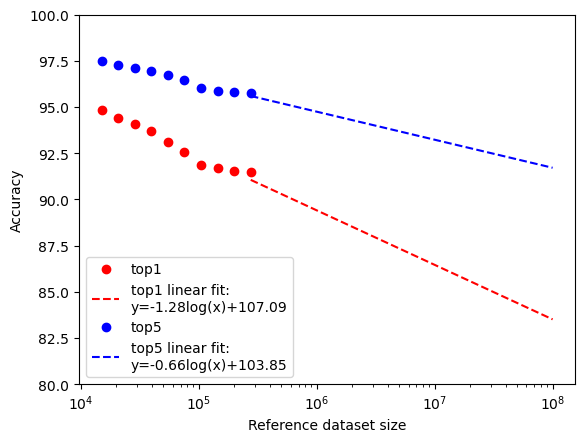

In [32]:


# Calculate linear regression for top 1 accuracy
coef1, interp1 = np.polyfit(np.log(ref_sizes), top_1_acc, 1)
poly1 = np.poly1d(coef1)
x1 = np.logspace(np.log(ref_sizes[0])/np.log(10), 8, 5)

# Calculate linear regression for top 5 accuracy
coef5, interp5 = np.polyfit(np.log(ref_sizes), top_5_acc, 1)
poly5 = np.poly1d(coef5)
x5 = np.logspace(np.log(ref_sizes[0])/np.log(10), 8, 5)

# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(x1, np.log(x1)*coef1+interp1, 'r--')
ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.plot(x5, np.log(x5)*coef5+interp5, 'b--')
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', f'top1 linear fit:\ny={coef1:.2f}log(x)+{interp1:.2f}', 
            'top5', f'top5 linear fit:\ny={coef5:.2f}log(x)+{interp5:.2f}'])
ax1.set_ylim(80, 100)
ax1.set_xscale('log')
x_ticks = np.asarray(ref_sizes)

# Display the plot
plt.show()

## 2 trends?
It appears that there are 2 trends, one for ref_dataset <10^5 and other for the rest. Let's make two different interpolations

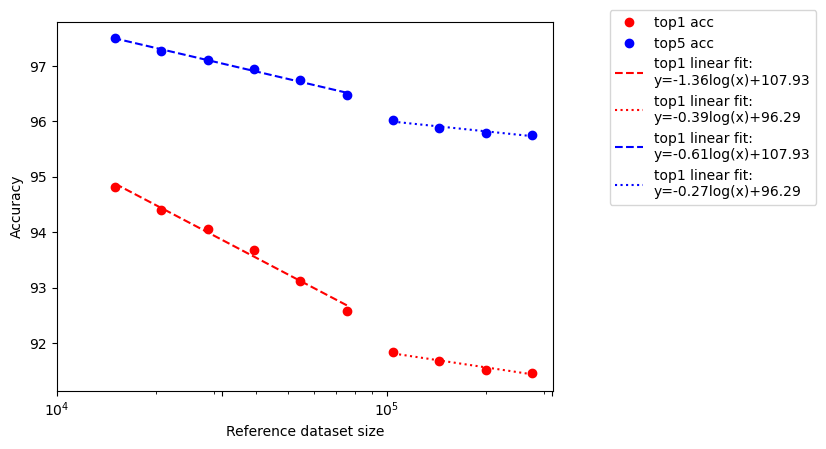

In [33]:
ref_sizes = np.asarray(ref_sizes)
# Calculate linear regression for top 1 accuracy
coef1_1, interp1_1 = np.polyfit(np.log(ref_sizes[ref_sizes<10**5]), top_1_acc[ref_sizes<10**5], 1)
x1_1 = ref_sizes[ref_sizes<10**5]

coef1_2, interp1_2 = np.polyfit(np.log(ref_sizes[ref_sizes>10**5]), top_1_acc[ref_sizes>10**5], 1)
x1_2 = ref_sizes[ref_sizes>10**5]

# Calculate linear regression for top 5 accuracy
coef5_1, interp5_1 = np.polyfit(np.log(ref_sizes[ref_sizes<10**5]), top_5_acc[ref_sizes<10**5], 1)
x5_1 = ref_sizes[ref_sizes<10**5]

coef5_2, interp5_2 = np.polyfit(np.log(ref_sizes[ref_sizes>10**5]), top_5_acc[ref_sizes>10**5], 1)
x5_2 = ref_sizes[ref_sizes>10**5]

# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro', label='top1 acc')
ax1.plot(ref_sizes, top_5_acc, 'bo', label='top5 acc')
#top1 linear plots for 2 trends
ax1.plot(x1_1, np.log(ref_sizes[ref_sizes<10**5])*coef1_1+interp1_1, 'r--', label=f'top1 linear fit:\ny={coef1_1:.2f}log(x)+{interp1_1:.2f}')
ax1.plot(x1_2, np.log(ref_sizes[ref_sizes>10**5])*coef1_2+interp1_2, 'r:', label=f'top1 linear fit:\ny={coef1_2:.2f}log(x)+{interp1_2:.2f}')

#top5 linear plots for 2 trends
ax1.plot(x5_1, np.log(ref_sizes[ref_sizes<10**5])*coef5_1+interp5_1, 'b--', label=f'top1 linear fit:\ny={coef5_1:.2f}log(x)+{interp1_1:.2f}')
ax1.plot(x5_2, np.log(ref_sizes[ref_sizes>10**5])*coef5_2+interp5_2, 'b:', label=f'top1 linear fit:\ny={coef5_2:.2f}log(x)+{interp1_2:.2f}')


ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(bbox_to_anchor=(1.1, 1.05))
#ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

ax1.set_xticks(x_ticks)
# Display the plot
plt.show()

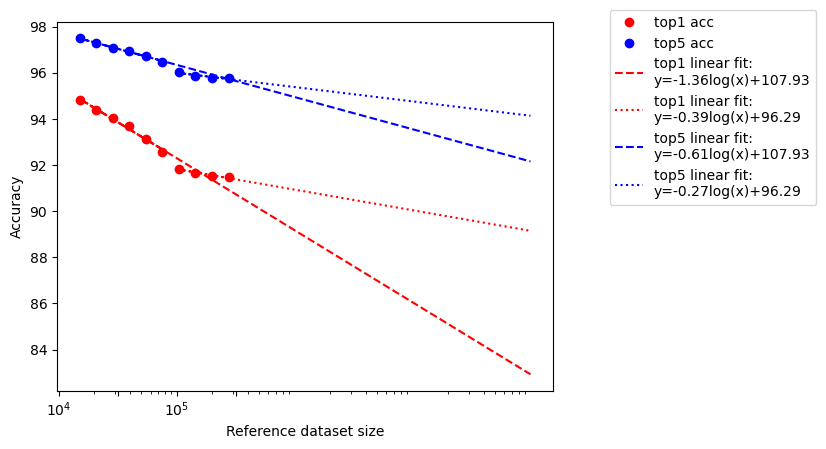

In [34]:
ref_sizes = np.asarray(ref_sizes)
# Calculate linear regression for top 1 accuracy
coef1_1, interp1_1 = np.polyfit(np.log(ref_sizes[ref_sizes<10**5]), top_1_acc[ref_sizes<10**5], 1)
x1_1 = ref_sizes[ref_sizes<10**5]
x1_1 = np.append(x1_1, [10**8])

coef1_2, interp1_2 = np.polyfit(np.log(ref_sizes[ref_sizes>10**5]), top_1_acc[ref_sizes>10**5], 1)
x1_2 = ref_sizes[ref_sizes>10**5]
x1_2 = np.append(x1_2, [ref_sizes[0], 10**8])

# Calculate linear regression for top 5 accuracy
coef5_1, interp5_1 = np.polyfit(np.log(ref_sizes[ref_sizes<10**5]), top_5_acc[ref_sizes<10**5], 1)
x5_1 = ref_sizes[ref_sizes<10**5]
x5_1 = np.append(x5_1, 10**8)
coef5_2, interp5_2 = np.polyfit(np.log(ref_sizes[ref_sizes>10**5]), top_5_acc[ref_sizes>10**5], 1)
x5_2 = ref_sizes[ref_sizes>10**5]
x5_2 = np.append(x5_2, [ref_sizes[0], 10**8])
# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro', label='top1 acc')
ax1.plot(ref_sizes, top_5_acc, 'bo', label='top5 acc')
#top1 linear plots for 2 trends
ax1.plot(x1_1, np.log(x1_1)*coef1_1+interp1_1, 'r--', label=f'top1 linear fit:\ny={coef1_1:.2f}log(x)+{interp1_1:.2f}')
ax1.plot(x1_2, np.log(x1_2)*coef1_2+interp1_2, 'r:', label=f'top1 linear fit:\ny={coef1_2:.2f}log(x)+{interp1_2:.2f}')

#top5 linear plots for 2 trends
ax1.plot(x5_1, np.log(x5_1)*coef5_1+interp5_1, 'b--', label=f'top5 linear fit:\ny={coef5_1:.2f}log(x)+{interp1_1:.2f}')
ax1.plot(x5_2, np.log(x5_2)*coef5_2+interp5_2, 'b:', label=f'top5 linear fit:\ny={coef5_2:.2f}log(x)+{interp1_2:.2f}')


ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(bbox_to_anchor=(1.1, 1.05))
#ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

ax1.set_xticks(x_ticks)
# Display the plot
plt.show()

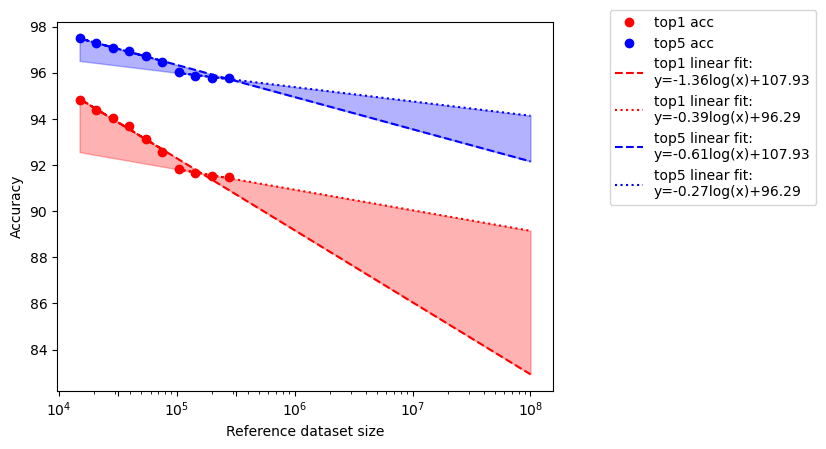

In [35]:
ref_sizes = np.asarray(ref_sizes)
fill_x = [ref_sizes[-1], 10**8]

# Calculate linear regression for top 1 accuracy
coef1_1, interp1_1 = np.polyfit(np.log(ref_sizes[ref_sizes<10**5]), top_1_acc[ref_sizes<10**5], 1)
x1_1 = ref_sizes[ref_sizes<10**5]
x1_1 = np.append(x1_1, [10**8])

coef1_2, interp1_2 = np.polyfit(np.log(ref_sizes[ref_sizes>10**5]), top_1_acc[ref_sizes>10**5], 1)
x1_2 = ref_sizes[ref_sizes>10**5]
x1_2 = np.append(x1_2, [ref_sizes[0], 10**8])

# Calculate linear regression for top 5 accuracy
coef5_1, interp5_1 = np.polyfit(np.log(ref_sizes[ref_sizes<10**5]), top_5_acc[ref_sizes<10**5], 1)
x5_1 = ref_sizes[ref_sizes<10**5]
x5_1 = np.append(x5_1, 10**8)
coef5_2, interp5_2 = np.polyfit(np.log(ref_sizes[ref_sizes>10**5]), top_5_acc[ref_sizes>10**5], 1)
x5_2 = ref_sizes[ref_sizes>10**5]
x5_2 = np.append(x5_2, [ref_sizes[0], 10**8])
# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro', label='top1 acc')
ax1.plot(ref_sizes, top_5_acc, 'bo', label='top5 acc')
#top1 linear plots for 2 trends
ax1.plot(x1_1, np.log(x1_1)*coef1_1+interp1_1, 'r--', label=f'top1 linear fit:\ny={coef1_1:.2f}log(x)+{interp1_1:.2f}')
ax1.plot(x1_2, np.log(x1_2)*coef1_2+interp1_2, 'r:', label=f'top1 linear fit:\ny={coef1_2:.2f}log(x)+{interp1_2:.2f}')
ax1.fill_between(fill_x, np.log(fill_x)*coef1_1+interp1_1, np.log(fill_x)*coef1_2+interp1_2, color='red', alpha = 0.3)

#top5 linear plots for 2 trends
ax1.plot(x5_1, np.log(x5_1)*coef5_1+interp5_1, 'b--', label=f'top5 linear fit:\ny={coef5_1:.2f}log(x)+{interp1_1:.2f}')
ax1.plot(x5_2, np.log(x5_2)*coef5_2+interp5_2, 'b:', label=f'top5 linear fit:\ny={coef5_2:.2f}log(x)+{interp1_2:.2f}')
ax1.fill_between(fill_x, np.log(fill_x)*coef5_1+interp5_1, np.log(fill_x)*coef5_2+interp5_2, color='blue', alpha = 0.3)

ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(bbox_to_anchor=(1.1, 1.05))
#ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5, 6, 7, 8])

ax1.set_xticks(x_ticks)
# Display the plot
plt.show()

In [36]:
ax1.fill_between(x5_2, np.log(x5_2)*coef5_1+interp5_1, np.log(x5_2)*coef5_2+interp5_2, color='blue')

##  accuracy vs corrugation
We compute the top1 and top5 accuracy but segregating by corrugation category

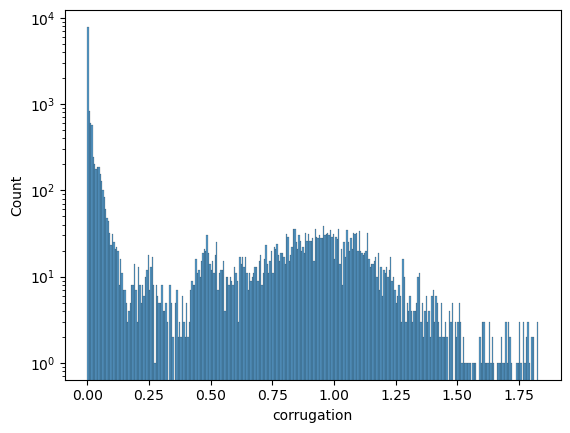

In [37]:
data = test_df[:N_SAMPLES]['corrugation']
# Create histogram plot
ax = sns.histplot(data, kde=False)

# Set log scale for y-axis
ax.set_yscale('log')

# Show the plot
plt.show()

In [38]:
corr_cat_counter = Counter(test_df['corr_cat'][:N_SAMPLES])
corr_cat_counter

Counter({2: 1996, 0: 11796, 1: 922, 3: 286})

In [39]:
acc_scaling_law[np.max(ref_sizes)].keys()

dict_keys(['top_1_mistakes', 'top_5_mistakes', 'top_1_mistakes_reorder', 'top_5_mistakes_reorder'])

In [40]:
top_1_mistakes =  acc_scaling_law[np.max(ref_sizes)]['top_1_mistakes']
top_1_mistakes_tie =  acc_scaling_law[np.max(ref_sizes)]['top_1_mistakes_tie']

top_5_mistakes =  acc_scaling_law[np.max(ref_sizes)]['top_5_mistakes']

KeyError: 'top_1_mistakes_tie'

In [41]:
int(test_df[test_df['CID'] == 22887579]['corr_cat'])

1

In [42]:
corr_cat_top1 = list()
corr_cat_top1_tie = list()
corr_cat_top5 = list()
for CID in top_1_mistakes:
    corr_cat_top1.append(int(test_df[test_df['CID'] == CID]['corr_cat']))
    
for CID in top_1_mistakes_tie:
    corr_cat_top1_tie.append(int(test_df[test_df['CID'] == CID]['corr_cat']))
    
    
for CID in top_5_mistakes:
    corr_cat_top5.append(int(test_df[test_df['CID'] == CID]['corr_cat']))
    
    
print(Counter(corr_cat_top1))
print(Counter(corr_cat_top1_tie))
print(Counter(corr_cat_top5))

NameError: name 'top_1_mistakes_tie' is not defined

In [43]:
for key, value in Counter(corr_cat_top1).items():
    print(key, value)

0 825
1 166
2 206
3 83


In [44]:
def top_acc_corr_cat(samples_df, top_1_mistakes, top_1_mistakes_tie, top_5_mistakes):
    '''Compute the top1 and top5 accuracy segregating by corr_cat
    ARGS:
            samples_df: dictonary contianing the CID and corrugation category of the
                        molecules for which identification is performed.
            top_{1,5}_mistakes: list of CID where the reference was not in the top {1,5} candidates'''
    
    corr_cat_top1 = list()
    corr_cat_top1_tie = list()
    corr_cat_top5 = list()
    for CID in top_1_mistakes:
        corr_cat_top1.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
    
    for CID in top_1_mistakes_tie:
        corr_cat_top1_tie.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
    
    for CID in top_5_mistakes:
        corr_cat_top5.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
    
    count_top1 = Counter(corr_cat_top1)
    count_top1_tie = Counter(corr_cat_top1_tie)
    count_top5 = Counter(corr_cat_top5)
    
    corr_cat_counter = Counter(samples_df['corr_cat']) #total number of samples corresponding to each category
    
    top_1_acc = dict()
    top_1_acc_tie = dict()
    top_5_acc = dict() 
    
    for key in corr_cat_counter.keys():
        top_1_acc[key] = (1-count_top1[key]/corr_cat_counter[key])*100
        top_1_acc_tie[key] = (1-count_top1_tie[key]/corr_cat_counter[key])*100
        top_5_acc[key] = (1-count_top5[key]/corr_cat_counter[key])*100
    top_1_acc = {k: v for k, v in sorted(top_1_acc.items())}
    top_1_acc_tie = {k: v for k, v in sorted(top_1_acc_tie.items())}
    top_5_acc = {k: v for k, v in sorted(top_5_acc.items())}
    return top_1_acc, top_1_acc_tie, top_5_acc

In [45]:
top_1_acc_segr, top_1_acc_segr_tie, top_5_acc_segr = top_acc_corr_cat(test_df[:N_SAMPLES], 
                                                                      top_1_mistakes, top_1_mistakes_tie, 
                                                                      top_5_mistakes)
print(top_1_acc_segr, top_1_acc_segr_tie, top_5_acc_segr)

NameError: name 'top_1_mistakes_tie' is not defined

In [46]:
# Create a dataframe with the data
data = {'Corrugation': list(top_1_acc_segr.keys()), 'top1 acc': list(top_1_acc_segr.values()), 'top5 acc': list(top_5_acc_segr.values())}
df = pd.DataFrame(data)
plt.rcParams.update(plt.rcParamsDefault)

# Melt the dataframe to show top1 acc and top5 acc in the same column
df = pd.melt(df, id_vars=['Corrugation'], value_vars=['top1 acc', 'top5 acc'], var_name='Accuracy')
df['value'] = df['value']/100 


# Separate dataframes for 'top1 acc' and 'top5 acc'
df_top1 = df[df['Accuracy'] == 'top1 acc']
df_top5 = df[df['Accuracy'] == 'top5 acc']

# Plot the bar plot
fig, ax = plt.subplots(figsize=(7,5))
width = 0.35  # width of the bars

bar1 = ax.bar(df_top1['Corrugation'], df_top1['value'], width, label='top1', color='b', capsize=5)
bar2 = ax.bar(df_top5['Corrugation'] + width, df_top5['value'], width, label='top5', color='r', capsize=5)

ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_ylim(0.65, 1)
ax.set_xticks(df_top1['Corrugation'] + width / 2)
ax.set_xticklabels(['<0.25', '0.25-0.75', '0.75-1.25', '>1.25'])

ax.legend(fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
#plt.savefig('/home/manuel/CODE/Pytorch-fingerprints/figures/top1_and_5_acc_corrugation.pdf', format="pdf", bbox_inches="tight")
# Display the plot
plt.show()
plt.show()


NameError: name 'top_1_acc_segr' is not defined

In [47]:
# Create a dataframe with the data
data = {'Corrugation': list(top_1_acc_segr.keys()), 'top1 acc': list(top_1_acc_segr.values()),
        'top1 acc tiebreak': list(top_1_acc_segr_tie.values()), 'top5 acc': list(top_5_acc_segr.values())}
df = pd.DataFrame(data)
plt.rcParams.update(plt.rcParamsDefault)

# Melt the dataframe to show top1 acc and top5 acc in the same column
df = pd.melt(df, id_vars=['Corrugation'], value_vars=['top1 acc', 'top1 acc tiebreak', 'top5 acc'], var_name='Accuracy')
df['value'] = df['value']/100 


# Separate dataframes for 'top1 acc' and 'top5 acc'
df_top1 = df[df['Accuracy'] == 'top1 acc']
df_top1_tie = df[df['Accuracy'] == 'top1 acc tiebreak']
df_top5 = df[df['Accuracy'] == 'top5 acc']

# Plot the bar plot
fig, ax = plt.subplots(figsize=(7,5))
width = 0.25  # width of the bars

bar1 = ax.bar(df_top1['Corrugation'], df_top1['value'], width, label='top1', color='r', capsize=5)
bar2 = ax.bar(df_top1_tie['Corrugation'] + width, df_top1_tie['value'], width, label='top1 tiebreak', color='g', capsize=5)
bar3 = ax.bar(df_top5['Corrugation'] + 2*width, df_top5['value'], width, label='top5', color='b', capsize=5)

ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_ylim(0.65, 1)
ax.set_xticks(df_top1['Corrugation'] + width / 2)
ax.set_xticklabels(['<0.25', '0.25-0.75', '0.75-1.25', '>1.25'])

ax.legend(fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
##plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_acc_corrugation_tie.pdf', format="pdf", bbox_inches="tight")
# Display the plot
plt.show()


NameError: name 'top_1_acc_segr' is not defined

In [108]:
np.max(ref_sizes)

275422

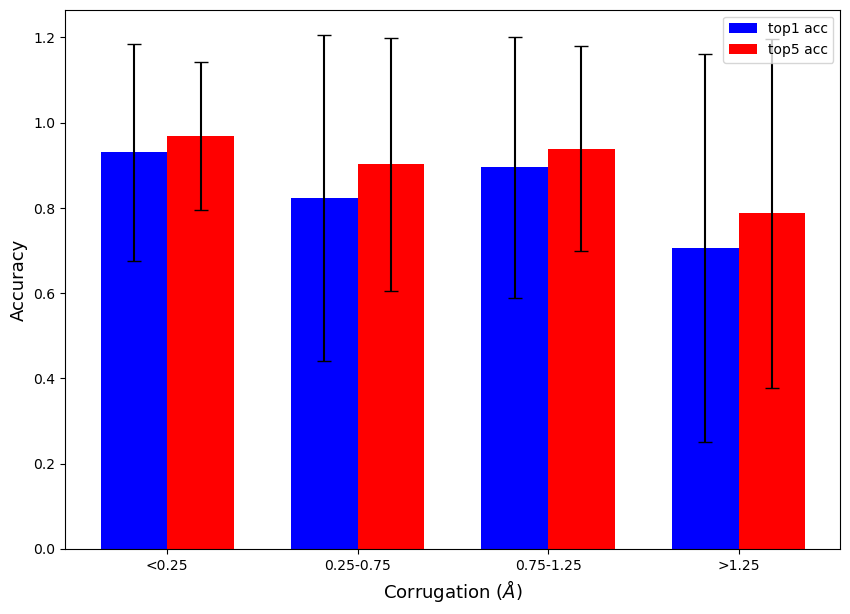

In [34]:
# Create a dataframe with the data
data = {'Corrugation': list(top_1_acc_segr.keys()), 'top1 acc': list(top_1_acc_segr.values()), 'top5 acc': list(top_5_acc_segr.values())}
df = pd.DataFrame(data)
plt.rcParams.update(plt.rcParamsDefault)

# Melt the dataframe to show top1 acc and top5 acc in the same column
df = pd.melt(df, id_vars=['Corrugation'], value_vars=['top1 acc', 'top5 acc'], var_name='Accuracy')
df['value'] = df['value']/100 
df['deviation'] = np.sqrt(df['value']*(1-df['value']))

# Separate dataframes for 'top1 acc' and 'top5 acc'
df_top1 = df[df['Accuracy'] == 'top1 acc']
df_top5 = df[df['Accuracy'] == 'top5 acc']

# Plot the bar plot
fig, ax = plt.subplots(figsize=(10,7))
width = 0.35  # width of the bars

bar1 = ax.bar(df_top1['Corrugation'], df_top1['value'], width, yerr=df_top1['deviation'], label='top1 acc', color='b', capsize=5)
bar2 = ax.bar(df_top5['Corrugation'] + width, df_top5['value'], width, yerr=df_top5['deviation'], label='top5 acc', color='r', capsize=5)

ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
#ax.set_ylim(0.65, 1)
ax.set_xticks(df_top1['Corrugation'] + width / 2)
ax.set_xticklabels(['<0.25', '0.25-0.75', '0.75-1.25', '>1.25'])

ax.legend()

plt.show()


### With top5 reordering

In [50]:
data_path = f'/home/{USER}/CODE/Pytorch-fingerprints/calculations/scaling_law_chemical_formula/acc_scaling_law_w_chem_form.pickle'

with open(data_path, 'rb') as handle:
    acc_scaling_law = pickle.load(handle)

In [51]:
test_df = dataset_df[dataset_df['split'] == 'test']
N_SAMPLES = 15000


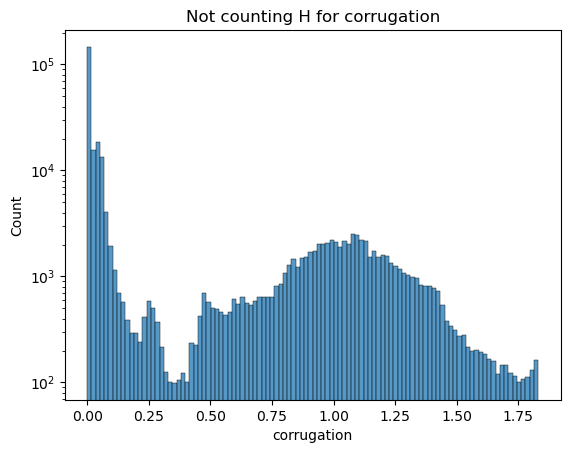

In [52]:
data = test_df['corrugation']
# Create histogram plot
ax = sns.histplot(data, kde=False)

# Set log scale for y-axis
ax.set_yscale('log')
plt.title('Not counting H for corrugation')
# Show the plot
plt.show()

In [53]:
def categorize_corr(corr):
    '''Convert corrugation (float) into a class'''
    corr = float(corr)
    assert (corr >= 0)
    if corr < 0.25:
        cat = 0
    elif corr < 0.75:
        cat = 1
    elif corr < 1.25:
        cat = 2
    else:
        cat = 3
    return cat

In [54]:
test_df['corr_cat'] = [categorize_corr(x) for x in test_df['corrugation']]
Counter(test_df['corr_cat'])

Counter({2: 49157, 0: 203887, 1: 12175, 3: 14629})

## Scale law figure

In [55]:
ref_sizes = list(acc_scaling_law.keys())
print(acc_scaling_law[ref_sizes[0]].keys())
acc_scaling_law[ref_sizes[0]]['top_1_mistakes']

dict_keys(['top_1_mistakes', 'top_5_mistakes', 'top_1_mistakes_tanimoto', 'top_1_mistakes_tie', 'top_1_mistakes_tanimoto_tie'])


[129712445,
 59383542,
 59383547,
 59390182,
 100822,
 101725283,
 102393,
 123683583,
 60134116,
 138831,
 58830918,
 58830949,
 13000274,
 13000286,
 123350949,
 136762336,
 12761319,
 12761330,
 12761531,
 85669101,
 123044,
 123908185,
 123911932,
 123912520,
 54300247,
 543014,
 134982501,
 134982825,
 134983592,
 22448215,
 123473743,
 123475825,
 129671794,
 13766956,
 13766965,
 13766967,
 129829073,
 129829432,
 129829435,
 23592500,
 59854140,
 59854142,
 59854147,
 123757801,
 59645563,
 58774645,
 85985737,
 85986644,
 85988850,
 85989461,
 124034542,
 71750269,
 54097614,
 54098412,
 126650924,
 135897203,
 135899568,
 129645177,
 129774538,
 22087375,
 134867626,
 59270990,
 129868456,
 130475637,
 59741931,
 23523247,
 58656424,
 12340268,
 123967434,
 59787205,
 59787225,
 59787227,
 59787233,
 59787244,
 123284874,
 123285067,
 13766984,
 85807103,
 71333029,
 71333463,
 71334116,
 18310,
 183178,
 564910,
 2751855,
 123147429,
 167605,
 167874,
 6431039,
 6431860,
 91

In [56]:
for i, ref_size in enumerate(ref_sizes):
    print(i, ref_size)

0 275422
1 199327
2 144255
3 104399
4 75555
5 54680
6 39573
7 28639
8 20726
9 15000


In [57]:
def top_acc(acc_scaling_law, n_samples):
    '''Extracts reference dataset sizes and computes top1 and top5 acc
    from acc_scaling_law dict.
    ARGS: acc_scaling_law: dictionary containing the CID for which the identification fails
          n_samples: number of samples to identify'''
    ref_sizes = list(acc_scaling_law.keys())
    top_1_acc = np.zeros(len(ref_sizes))
    top_5_acc = np.zeros(len(ref_sizes))
    for i, ref_size in enumerate(ref_sizes):
        top_1_acc[i] =  len(acc_scaling_law[ref_size]['top_1_mistakes'])
        top_5_acc[i] =  len(acc_scaling_law[ref_size]['top_5_mistakes'])
    
    top_1_acc = (1 - top_1_acc/n_samples)*100
    top_5_acc = (1 - top_5_acc/n_samples)*100

    return ref_sizes, top_1_acc, top_5_acc
        

    
    

In [58]:
ref_sizes, top_1_acc, top_5_acc = top_acc(acc_scaling_law, N_SAMPLES)
print(ref_sizes, top_1_acc, top_5_acc)

[275422, 199327, 144255, 104399, 75555, 54680, 39573, 28639, 20726, 15000] [91.46666667 91.52       91.67333333 91.83333333 92.58666667 93.12666667
 93.68       94.05333333 94.4        94.82      ] [95.76       95.79333333 95.88666667 96.02       96.48       96.74666667
 96.94       97.1        97.28       97.5       ]


In [59]:
acc_scaling_law[275422].keys()

dict_keys(['top_1_mistakes', 'top_5_mistakes', 'top_1_mistakes_tanimoto', 'top_1_mistakes_tie', 'top_1_mistakes_tanimoto_tie'])

In [60]:
def top_acc_w_tie(acc_scaling_law, n_samples):
    '''Extracts reference dataset sizes and computes top1, top1_w_tiebreak and top5 acc
    from acc_scaling_law dict.
    ARGS: acc_scaling_law: dictionary containing the CID for which the identification fails
          n_samples: number of samples to identify'''
    ref_sizes = list(acc_scaling_law.keys())
    top_1_acc = np.zeros(len(ref_sizes))
    top_1_acc_w_tiebreak = np.zeros(len(ref_sizes))
    top_5_acc = np.zeros(len(ref_sizes))
    
    for i, ref_size in enumerate(ref_sizes):
        top_1_acc[i] =  len(acc_scaling_law[ref_size]['top_1_mistakes'])
        top_1_acc_w_tiebreak[i] =  len(acc_scaling_law[ref_size]['top_1_mistakes_tie'])
        top_5_acc[i] =  len(acc_scaling_law[ref_size]['top_5_mistakes'])
    
    top_1_acc = (1 - top_1_acc/n_samples)*100
    top_1_acc_w_tiebreak = (1 - top_1_acc_w_tiebreak/n_samples)*100
    top_5_acc = (1 - top_5_acc/n_samples)*100

    return ref_sizes, top_1_acc, top_1_acc_w_tiebreak, top_5_acc

In [61]:
ref_sizes, top_1_acc, top_1_acc_w_tiebreak, top_5_acc =  top_acc_w_tie(acc_scaling_law, N_SAMPLES)
print(ref_sizes, top_1_acc, top_1_acc_w_tiebreak, top_5_acc )

[275422, 199327, 144255, 104399, 75555, 54680, 39573, 28639, 20726, 15000] [91.46666667 91.52       91.67333333 91.83333333 92.58666667 93.12666667
 93.68       94.05333333 94.4        94.82      ] [94.60666667 94.6        94.70666667 94.90666667 95.5        95.93333333
 96.11333333 96.28666667 96.51333333 96.83333333] [95.76       95.79333333 95.88666667 96.02       96.48       96.74666667
 96.94       97.1        97.28       97.5       ]


In [ ]:
accuracies_df = pd.DataFrame({'top_1_acc': top_1_acc[0], 
                              
    
})

seaborn.barplot(data=None, *, x=None, y=None

In [62]:
x_ticks = 10**np.asarray([4,4.5, 5, 5.5, 6])
x_ticks

array([  10000.        ,   31622.77660168,  100000.        ,
        316227.76601684, 1000000.        ])

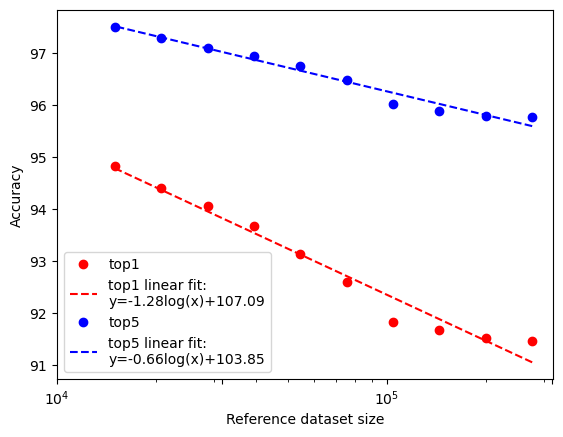

In [63]:

# Calculate linear regression for top 1 accuracy
coef1, interp1 = np.polyfit(np.log(ref_sizes), top_1_acc, 1)
poly1 = np.poly1d(coef1)
x1 = ref_sizes

# Calculate linear regression for top 5 accuracy
coef5, interp5 = np.polyfit(np.log(ref_sizes), top_5_acc, 1)
poly5 = np.poly1d(coef5)
x5 = ref_sizes

# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(x1, np.log(ref_sizes)*coef1+interp1, 'r--')
ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.plot(x5, np.log(ref_sizes)*coef5+interp5, 'b--')
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', f'top1 linear fit:\ny={coef1:.2f}log(x)+{interp1:.2f}', 
            'top5', f'top5 linear fit:\ny={coef5:.2f}log(x)+{interp5:.2f}'])
#ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

ax1.set_xticks(x_ticks)
# Display the plot
plt.show()

In [102]:
def top_acc_w_tie(acc_scaling_law, n_samples):
    '''Extracts reference dataset sizes and computes top1, top1_w_tiebreak and top5 acc
    from acc_scaling_law dict.
    ARGS: acc_scaling_law: dictionary containing the CID for which the identification fails
          n_samples: number of samples to identify'''
    ref_sizes = list(acc_scaling_law.keys())
    top_1_acc = np.zeros(len(ref_sizes))
    top_1_acc_reorder = np.zeros(len(ref_sizes))
    top_5_acc = np.zeros(len(ref_sizes))
    top_5_acc_reorder = np.zeros(len(ref_sizes))
    
    for i, ref_size in enumerate(ref_sizes):
        top_1_acc[i] =  len(acc_scaling_law[ref_size]['top_1_mistakes'])
        top_1_acc_reorder[i] =  len(acc_scaling_law[ref_size]['top_1_mistakes_reorder'])
        top_5_acc[i] =  len(acc_scaling_law[ref_size]['top_5_mistakes'])
        top_5_acc_reorder[i] =  len(acc_scaling_law[ref_size]['top_5_mistakes_reorder'])

    
    top_1_acc = (1 - top_1_acc/n_samples)*100
    top_1_acc_reorder = (1 - top_1_acc_reorder/n_samples)*100
    top_5_acc = (1 - top_5_acc/n_samples)*100
    top_5_acc_reorder = (1 - top_5_acc_reorder/n_samples)*100

    return ref_sizes, top_1_acc, top_1_acc_reorder, top_5_acc, top_5_acc_reorder

ref_sizes, top_1_acc, top_1_acc_reorder, top_5_acc, top_5_acc_reorder =  top_acc_w_tie(acc_scaling_law, N_SAMPLES)
print(ref_sizes, '\n',
      top_1_acc, '\n',
      top_1_acc_reorder, '\n',
      top_5_acc, '\n',
      top_5_acc_reorder, '\n',
     )


[275422, 199327, 144255, 104399, 75555, 54680, 39573, 28639, 20726, 15000] 
 [91.46666667 91.52       91.67333333 91.83333333 92.58666667 93.12666667
 93.68       94.05333333 94.4        94.82      ] 
 [95.08666667 95.18       95.25333333 95.46       95.92666667 96.27333333
 96.46       96.63333333 96.94666667 97.28      ] 
 [95.76       95.79333333 95.88666667 96.02       96.48       96.74666667
 96.94       97.1        97.28       97.5       ] 
 [96.52       96.64       96.75333333 96.88666667 97.14666667 97.32666667
 97.48666667 97.64       97.86       98.1       ] 



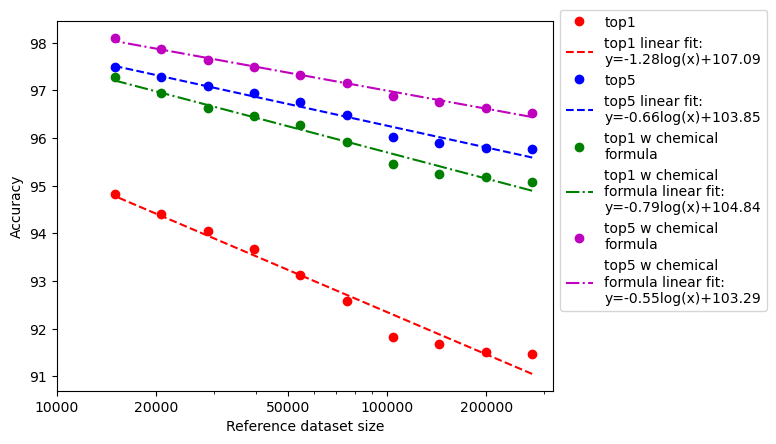

In [98]:
# Calculate linear regression for top 1 accuracy
coef1, interp1 = np.polyfit(np.log(ref_sizes), top_1_acc, 1)
coef1_t, interp1_t = np.polyfit(np.log(ref_sizes), top_1_acc_reorder, 1)


poly1 = np.poly1d(coef1)
x1 = ref_sizes

# Calculate linear regression for top 5 accuracy
coef5, interp5 = np.polyfit(np.log(ref_sizes), top_5_acc, 1)
coef5_t, interp5_t = np.polyfit(np.log(ref_sizes), top_5_acc_reorder, 1)

poly5 = np.poly1d(coef5)
x5 = ref_sizes

# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(x1, np.log(ref_sizes)*coef1+interp1, 'r--')
ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.plot(x5, np.log(ref_sizes)*coef5+interp5, 'b--')

ax1.plot(ref_sizes, top_1_acc_reorder, 'go')
ax1.plot(x1, np.log(ref_sizes)*coef1_t+interp1_t, 'g-.')
ax1.plot(ref_sizes, top_5_acc_reorder, 'mo')
ax1.plot(x5, np.log(ref_sizes)*coef5_t+interp5_t,'m-.' )
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', f'top1 linear fit:\ny={coef1:.2f}log(x)+{interp1:.2f}',
            'top5', f'top5 linear fit:\ny={coef5:.2f}log(x)+{interp5:.2f}',
            'top1 w chemical \nformula', f'top1 w chemical  \nformula linear fit:\ny={coef1_t:.2f}log(x)+{interp1_t:.2f}',
           'top5 w chemical \nformula', f'top5 w chemical  \nformula linear fit:\ny={coef5_t:.2f}log(x)+{interp5_t:.2f}'],
          bbox_to_anchor=(1., 1.05))
#ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

x_ticks = np.array([1e4, 2e4, 5e4, 1e5, 2e5])

ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks.astype(int), fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

##plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_acc_w_chem_formula_reorder.pdf', format="pdf", bbox_inches="tight")

# Display the plot
plt.show()
plt.close()

### Bar plot of accuracies 275k

In [111]:
ref_sizes, top_1_acc, top_1_acc_reorder, top_5_acc, top_5_acc_reorder =  top_acc_w_tie(acc_scaling_law, N_SAMPLES)
print(ref_sizes, '\n',
      top_1_acc, '\n',
      top_1_acc_reorder, '\n',
      top_5_acc, '\n',
      top_5_acc_reorder, '\n',
     )

indices = ['top1', 'top1 w chemical', 'top5', 'top5 w chemical']
accuracies = [top_1_acc[0], top_1_acc_reorder[0], top_5_acc[0], top_5_acc_reorder[0]]

# Create a DataFrame with the indices
accuracies_df = pd.DataFrame({'labels': indices,
                             'acc': accuracies})

# Print the DataFrame
print(accuracies_df)

[275422, 199327, 144255, 104399, 75555, 54680, 39573, 28639, 20726, 15000] 
 [91.46666667 91.52       91.67333333 91.83333333 92.58666667 93.12666667
 93.68       94.05333333 94.4        94.82      ] 
 [95.08666667 95.18       95.25333333 95.46       95.92666667 96.27333333
 96.46       96.63333333 96.94666667 97.28      ] 
 [95.76       95.79333333 95.88666667 96.02       96.48       96.74666667
 96.94       97.1        97.28       97.5       ] 
 [96.52       96.64       96.75333333 96.88666667 97.14666667 97.32666667
 97.48666667 97.64       97.86       98.1       ] 

            labels        acc
0             top1  91.466667
1  top1 w chemical  95.086667
2             top5  95.760000
3  top5 w chemical  96.520000


<Figure size 640x480 with 0 Axes>

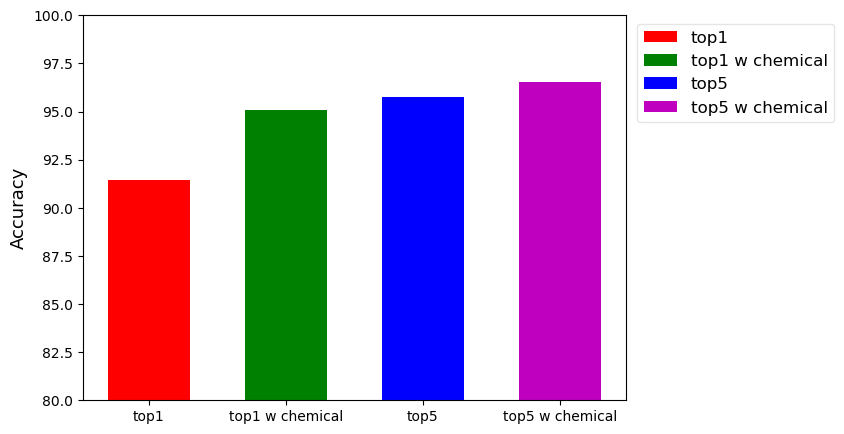

In [137]:


# Plot the bar plot
fig, ax = plt.subplots(figsize=(7,5))
width = 0.6  # width of the bars
i = 0
colors = ['r', 'g', 'b', 'm']
for indice, accuracy in zip(indices, accuracies):
    
    ax.bar(indice, accuracy, width, label=indice, color=colors[i], capsize=5)
    i=i+1

ax.set_ylabel('Accuracy', fontsize=13)
ax.set_ylim(80, 100)
#ax.set_xticks(df_top1['Corrugation'] + width / 2)

ax.legend(fontsize=12, framealpha=0.5,fancybox=True, bbox_to_anchor=(1.4, 1.0))



# Display the plot
plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_reorder_chem_accuracy_barplot.pdf', format="pdf", bbox_inches="tight")
plt.show()

In [67]:
np.log(ref_sizes)/np.log(10)

array([5.43999863, 5.29956613, 5.15913088, 5.01869634, 4.87826321,
       4.73782851, 4.59739898, 4.45695785, 4.31651549, 4.17609126])

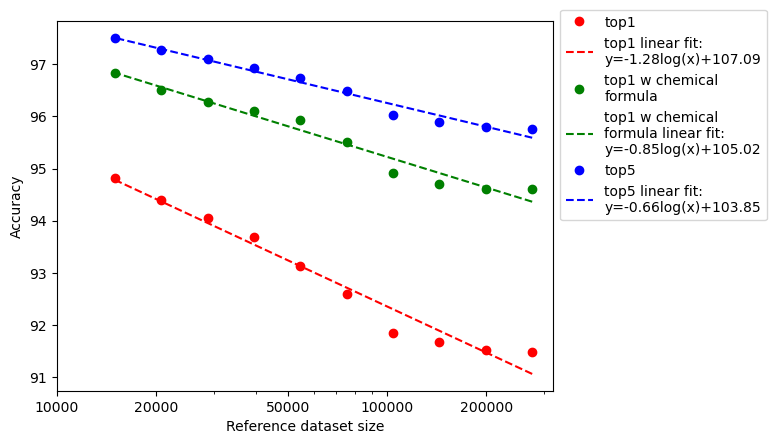

In [68]:
# Calculate linear regression for top 1 accuracy
coef1, interp1 = np.polyfit(np.log(ref_sizes), top_1_acc, 1)
coef1_t, interp1_t = np.polyfit(np.log(ref_sizes), top_1_acc_w_tiebreak, 1)


poly1 = np.poly1d(coef1)
x1 = ref_sizes

# Calculate linear regression for top 5 accuracy
coef5, interp5 = np.polyfit(np.log(ref_sizes), top_5_acc, 1)
poly5 = np.poly1d(coef5)
x5 = ref_sizes

# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(x1, np.log(ref_sizes)*coef1+interp1, 'r--')
ax1.plot(ref_sizes, top_1_acc_w_tiebreak, 'go')
ax1.plot(x1, np.log(ref_sizes)*coef1_t+interp1_t, 'g--')

ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.plot(x5, np.log(ref_sizes)*coef5+interp5, 'b--')
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', f'top1 linear fit:\ny={coef1:.2f}log(x)+{interp1:.2f}',
            'top1 w chemical \nformula', f'top1 w chemical  \nformula linear fit:\ny={coef1_t:.2f}log(x)+{interp1_t:.2f}',
            'top5', f'top5 linear fit:\ny={coef5:.2f}log(x)+{interp5:.2f}'],
          bbox_to_anchor=(1., 1.05))
#ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

x_ticks = np.array([1e4, 2e4, 5e4, 1e5, 2e5])

ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks.astype(int), fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_acc_w_chem_formula_reference_size.pdf', format="pdf", bbox_inches="tight")

# Display the plot
plt.show()

## 2 trends?
It appears that there are 2 trends, one for ref_dataset <10^5 and other for the rest. Let's make two different interpolations

##  accuracy vs corrugation
We compute the top1 and top5 accuracy but segregating by corrugation category

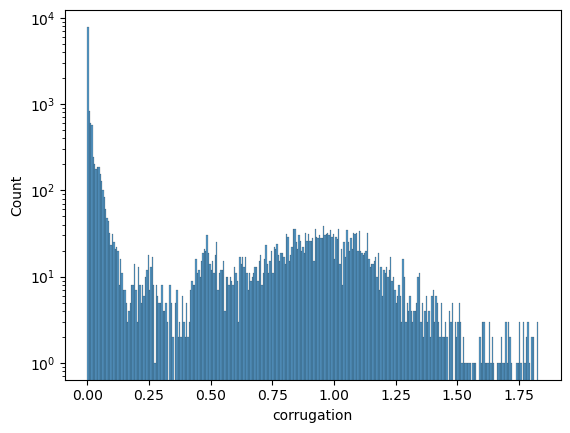

In [69]:
data = test_df[:N_SAMPLES]['corrugation']
# Create histogram plot
ax = sns.histplot(data, kde=False)

# Set log scale for y-axis
ax.set_yscale('log')

# Show the plot
plt.show()

In [70]:
corr_cat_counter = Counter(test_df['corr_cat'][:N_SAMPLES])
corr_cat_counter

Counter({2: 1996, 0: 11796, 1: 922, 3: 286})

In [71]:
acc_scaling_law[np.max(ref_sizes)].keys()

dict_keys(['top_1_mistakes', 'top_5_mistakes', 'top_1_mistakes_tanimoto', 'top_1_mistakes_tie', 'top_1_mistakes_tanimoto_tie'])

In [72]:
top_1_mistakes =  acc_scaling_law[np.max(ref_sizes)]['top_1_mistakes']
top_1_mistakes_tie =  acc_scaling_law[np.max(ref_sizes)]['top_1_mistakes_tie']

top_5_mistakes =  acc_scaling_law[np.max(ref_sizes)]['top_5_mistakes']

In [73]:
int(test_df[test_df['CID'] == 22887579]['corr_cat'])

1

In [74]:
corr_cat_top1 = list()
corr_cat_top1_tie = list()
corr_cat_top5 = list()
for CID in top_1_mistakes:
    corr_cat_top1.append(int(test_df[test_df['CID'] == CID]['corr_cat']))
    
for CID in top_1_mistakes_tie:
    corr_cat_top1_tie.append(int(test_df[test_df['CID'] == CID]['corr_cat']))
    
    
for CID in top_5_mistakes:
    corr_cat_top5.append(int(test_df[test_df['CID'] == CID]['corr_cat']))
    
    
print(Counter(corr_cat_top1))
print(Counter(corr_cat_top1_tie))
print(Counter(corr_cat_top5))

Counter({0: 825, 2: 206, 1: 166, 3: 83})
Counter({0: 475, 2: 154, 1: 106, 3: 74})
Counter({0: 363, 2: 123, 1: 89, 3: 61})


In [75]:
for key, value in Counter(corr_cat_top1).items():
    print(key, value)

0 825
1 166
2 206
3 83


In [76]:
def top_acc_corr_cat(samples_df, top_1_mistakes, top_1_mistakes_tie, top_5_mistakes):
    '''Compute the top1 and top5 accuracy segregating by corr_cat
    ARGS:
            samples_df: dictonary contianing the CID and corrugation category of the
                        molecules for which identification is performed.
            top_{1,5}_mistakes: list of CID where the reference was not in the top {1,5} candidates'''
    
    corr_cat_top1 = list()
    corr_cat_top1_tie = list()
    corr_cat_top5 = list()
    for CID in top_1_mistakes:
        corr_cat_top1.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
    
    for CID in top_1_mistakes_tie:
        corr_cat_top1_tie.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
    
    for CID in top_5_mistakes:
        corr_cat_top5.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
    
    count_top1 = Counter(corr_cat_top1)
    count_top1_tie = Counter(corr_cat_top1_tie)
    count_top5 = Counter(corr_cat_top5)
    
    corr_cat_counter = Counter(samples_df['corr_cat']) #total number of samples corresponding to each category
    
    top_1_acc = dict()
    top_1_acc_tie = dict()
    top_5_acc = dict() 
    
    for key in corr_cat_counter.keys():
        top_1_acc[key] = (1-count_top1[key]/corr_cat_counter[key])*100
        top_1_acc_tie[key] = (1-count_top1_tie[key]/corr_cat_counter[key])*100
        top_5_acc[key] = (1-count_top5[key]/corr_cat_counter[key])*100
    top_1_acc = {k: v for k, v in sorted(top_1_acc.items())}
    top_1_acc_tie = {k: v for k, v in sorted(top_1_acc_tie.items())}
    top_5_acc = {k: v for k, v in sorted(top_5_acc.items())}
    return top_1_acc, top_1_acc_tie, top_5_acc

In [77]:
top_1_acc_segr, top_1_acc_segr_tie, top_5_acc_segr = top_acc_corr_cat(test_df[:N_SAMPLES], 
                                                                      top_1_mistakes, top_1_mistakes_tie, 
                                                                      top_5_mistakes)
print(top_1_acc_segr, top_1_acc_segr_tie, top_5_acc_segr)

{0: 93.0061037639878, 1: 81.99566160520607, 2: 89.67935871743487, 3: 70.97902097902097} {0: 95.97321125805358, 1: 88.50325379609545, 2: 92.28456913827655, 3: 74.12587412587412} {0: 96.92268565615463, 1: 90.3470715835141, 2: 93.8376753507014, 3: 78.67132867132867}


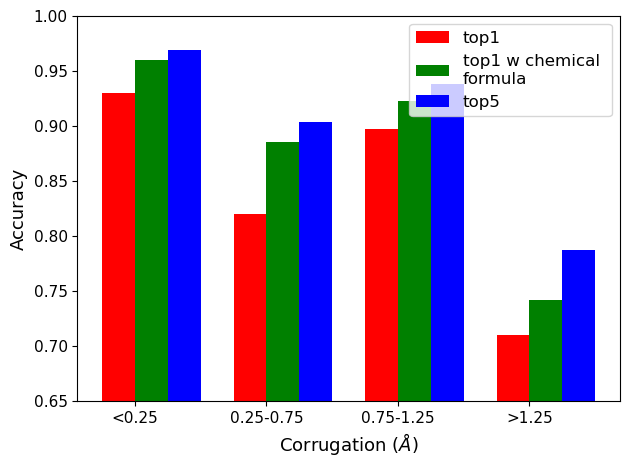

In [78]:
# Create a dataframe with the data
data = {'Corrugation': list(top_1_acc_segr.keys()), 'top1 acc': list(top_1_acc_segr.values()),
        'top1 acc tiebreak': list(top_1_acc_segr_tie.values()), 'top5 acc': list(top_5_acc_segr.values())}
df = pd.DataFrame(data)
plt.rcParams.update(plt.rcParamsDefault)

# Melt the dataframe to show top1 acc and top5 acc in the same column
df = pd.melt(df, id_vars=['Corrugation'], value_vars=['top1 acc', 'top1 acc tiebreak', 'top5 acc'], var_name='Accuracy')
df['value'] = df['value']/100 


# Separate dataframes for 'top1 acc' and 'top5 acc'
df_top1 = df[df['Accuracy'] == 'top1 acc']
df_top1_tie = df[df['Accuracy'] == 'top1 acc tiebreak']
df_top5 = df[df['Accuracy'] == 'top5 acc']

# Plot the bar plot
fig, ax = plt.subplots(figsize=(7,5))
width = 0.25  # width of the bars

bar1 = ax.bar(df_top1['Corrugation'], df_top1['value'], width, label='top1', color='r', capsize=5)
bar2 = ax.bar(df_top1_tie['Corrugation'] + width, df_top1_tie['value'], width, label='top1 w chemical \nformula', color='g', capsize=5)
bar3 = ax.bar(df_top5['Corrugation'] + 2*width, df_top5['value'], width, label='top5', color='b', capsize=5)

ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_ylim(0.65, 1)
ax.set_xticks(df_top1['Corrugation'] + width / 2)
ax.set_xticklabels(['<0.25', '0.25-0.75', '0.75-1.25', '>1.25'])

ax.legend(fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
#plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_acc_w_chem_formula_corrugation_tie.pdf', format="pdf", bbox_inches="tight")
# Display the plot
plt.show()


In [85]:
def top_acc_corr_cat(samples_df, top_1_mistakes, top_1_mistakes_reorder, top_5_mistakes, top_5_mistakes_reorder):
    '''Compute the top1 and top5 accuracy segregating by corr_cat
    ARGS:
            samples_df: dictonary contianing the CID and corrugation category of the
                        molecules for which identification is performed.
            top_{1,5}_mistakes: list of CID where the reference was not in the top {1,5} candidates'''
    
    corr_cat_top1 = list()
    corr_cat_top1_reorder = list()
    corr_cat_top5 = list()
    corr_cat_top5_reorder = list()
    for CID in top_1_mistakes:
        corr_cat_top1.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
    
    for CID in top_1_mistakes_reorder:
        corr_cat_top1_reorder.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
    
    for CID in top_5_mistakes:
        corr_cat_top5.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
        
    for CID in top_5_mistakes_reorder:
        corr_cat_top5_reorder.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
        
    count_top1 = Counter(corr_cat_top1)
    count_top1_reorder = Counter(corr_cat_top1_reorder)
    count_top5 = Counter(corr_cat_top5)
    count_top5_reorder = Counter(corr_cat_top5_reorder)
    
    corr_cat_counter = Counter(samples_df['corr_cat']) #total number of samples corresponding to each category
    
    top_1_acc = dict()
    top_1_acc_reorder = dict()
    top_5_acc = dict() 
    top_5_acc_reorder = dict()

    for key in corr_cat_counter.keys():
        top_1_acc[key] = (1-count_top1[key]/corr_cat_counter[key])*100
        top_1_acc_reorder[key] = (1-count_top1_reorder[key]/corr_cat_counter[key])*100
        top_5_acc[key] = (1-count_top5[key]/corr_cat_counter[key])*100
        top_5_acc_reorder[key] = (1-count_top5_reorder[key]/corr_cat_counter[key])*100
    top_1_acc = {k: v for k, v in sorted(top_1_acc.items())}
    top_1_acc_reorder = {k: v for k, v in sorted(top_1_acc_reorder.items())}
    top_5_acc = {k: v for k, v in sorted(top_5_acc.items())}
    top_5_acc_reorder = {k: v for k, v in sorted(top_5_acc_reorder.items())}

    return top_1_acc, top_1_acc_reorder, top_5_acc, top_5_acc_reorder

In [88]:
data_path = f'/home/{USER}/CODE/Pytorch-fingerprints/calculations/scaling_law_chemical_formula/acc_scaling_law_top10.pickle'

with open(data_path, 'rb') as handle:
    acc_scaling_law = pickle.load(handle)
acc_scaling_law[275422].keys()

dict_keys(['top_1_mistakes', 'top_5_mistakes', 'top_1_mistakes_reorder', 'top_5_mistakes_reorder'])

In [90]:
top_1_mistakes =  acc_scaling_law[np.max(ref_sizes)]['top_1_mistakes']
top_1_mistakes_reorder =  acc_scaling_law[np.max(ref_sizes)]['top_1_mistakes_reorder']
top_5_mistakes =  acc_scaling_law[np.max(ref_sizes)]['top_5_mistakes']
top_5_mistakes_reorder =  acc_scaling_law[np.max(ref_sizes)]['top_5_mistakes_reorder']


In [91]:
top_1_acc, top_1_acc_reorder, top_5_acc, top_5_acc_reorder = top_acc_corr_cat(test_df[:N_SAMPLES], 
                                                                      top_1_mistakes, top_1_mistakes_reorder, 
                                                                      top_5_mistakes, top_5_mistakes_reorder)
print(top_1_acc, top_1_acc_reorder, top_5_acc, top_5_acc_reorder)

{0: 93.0061037639878, 1: 81.99566160520607, 2: 89.67935871743487, 3: 70.97902097902097} {0: 96.4479484571041, 1: 89.587852494577, 2: 92.63527054108216, 3: 73.77622377622377} {0: 96.92268565615463, 1: 90.3470715835141, 2: 93.8376753507014, 3: 78.67132867132867} {0: 97.558494404883, 1: 91.97396963123644, 2: 94.73947895791584, 3: 80.76923076923077}


In [92]:
# Create a dataframe with the data
data = {'Corrugation': list(top_1_acc.keys()), 'top1 acc': list(top_1_acc.values()),
        'top1 acc chem formula': list(top_1_acc_reorder.values()), 'top5 acc': list(top_5_acc.values()), 
       'top5 acc chem formula': list(top_5_acc_reorder.values()),}
df = pd.DataFrame(data)
plt.rcParams.update(plt.rcParamsDefault)

# Melt the dataframe to show top1 acc and top5 acc in the same column
df = pd.melt(df, id_vars=['Corrugation'], value_vars=['top1 acc', 'top1 acc tiebreak', 'top5 acc'], var_name='Accuracy')
df['value'] = df['value']/100 


# Separate dataframes for 'top1 acc' and 'top5 acc'
df_top1 = df[df['Accuracy'] == 'top1 acc']
df_top1_tie = df[df['Accuracy'] == 'top1 acc tiebreak']
df_top5 = df[df['Accuracy'] == 'top5 acc']

# Plot the bar plot
fig, ax = plt.subplots(figsize=(7,5))
width = 0.25  # width of the bars

bar1 = ax.bar(df_top1['Corrugation'], df_top1['value'], width, label='top1', color='r', capsize=5)
bar2 = ax.bar(df_top1_tie['Corrugation'] + width, df_top1_tie['value'], width, label='top1 w chemical \nformula', color='g', capsize=5)
bar3 = ax.bar(df_top5['Corrugation'] + 2*width, df_top5['value'], width, label='top5', color='b', capsize=5)

ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_ylim(0.65, 1)
ax.set_xticks(df_top1['Corrugation'] + width / 2)
ax.set_xticklabels(['<0.25', '0.25-0.75', '0.75-1.25', '>1.25'])

ax.legend(fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
##plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_acc_w_chem_formula_corrugation_tie.pdf', format="pdf", bbox_inches="tight")
# Display the plot
plt.show()


KeyError: "The following 'value_vars' are not present in the DataFrame: ['top1 acc tiebreak']"

    Corrugation               Accuracy     value
0             0               top1 acc  0.930061
1             1               top1 acc  0.819957
2             2               top1 acc  0.896794
3             3               top1 acc  0.709790
4             0  top1 acc chem formula  0.964479
5             1  top1 acc chem formula  0.895879
6             2  top1 acc chem formula  0.926353
7             3  top1 acc chem formula  0.737762
8             0               top5 acc  0.969227
9             1               top5 acc  0.903471
10            2               top5 acc  0.938377
11            3               top5 acc  0.786713
12            0  top5 acc chem formula  0.975585
13            1  top5 acc chem formula  0.919740
14            2  top5 acc chem formula  0.947395
15            3  top5 acc chem formula  0.807692


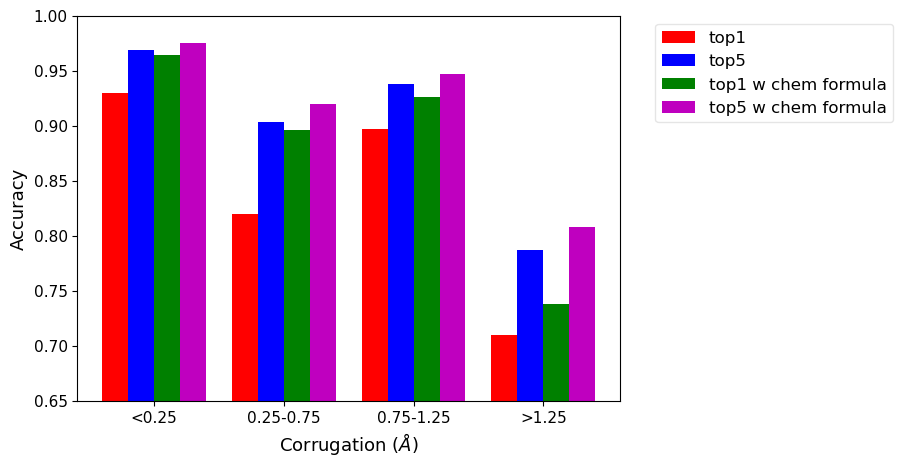

In [96]:
# Melt the dataframe to show top1 acc, top1 acc chem formula, top5 acc and top5 acc chem formula in the same column
data = {'Corrugation': list(top_1_acc.keys()), 'top1 acc': list(top_1_acc.values()),
        'top1 acc chem formula': list(top_1_acc_reorder.values()), 'top5 acc': list(top_5_acc.values()), 
       'top5 acc chem formula': list(top_5_acc_reorder.values()),}
df = pd.DataFrame(data)

df = pd.melt(df, id_vars=['Corrugation'], value_vars=['top1 acc', 'top1 acc chem formula', 'top5 acc', 'top5 acc chem formula'], var_name='Accuracy')
df['value'] = df['value']/100 

# Separate dataframes for 'top1 acc', 'top1 acc chem formula', 'top5 acc' and 'top5 acc chem formula'
df_top1 = df[df['Accuracy'] == 'top1 acc']
df_top1_formula = df[df['Accuracy'] == 'top1 acc chem formula']
df_top5 = df[df['Accuracy'] == 'top5 acc']
df_top5_formula = df[df['Accuracy'] == 'top5 acc chem formula']

# Plot the bar plot
fig, ax = plt.subplots(figsize=(7,5))
width = 0.2  # width of the bars

bar1 = ax.bar(df_top1['Corrugation']-width, df_top1['value'], width, label='top1', color='r', capsize=5)
bar2 = ax.bar(df_top5['Corrugation'] , df_top5['value'], width, label='top5', color='b', capsize=5)
bar3 = ax.bar(df_top1_formula['Corrugation'] + width, df_top1_formula['value'], width, label='top1 w chem formula', color='g', capsize=5)
bar4 = ax.bar(df_top5_formula['Corrugation'] + 2*width, df_top5_formula['value'], width, label='top5 w chem formula', color='m', capsize=5)

ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_ylim(0.65, 1)
ax.set_xticks(df_top1['Corrugation'] + width / 2)
ax.set_xticklabels(['<0.25', '0.25-0.75', '0.75-1.25', '>1.25'])

ax.legend(fontsize=12, framealpha=0.5,fancybox=True, bbox_to_anchor=(1.05, 1.0))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
# Display the plot
print(df)
##plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_reorder_chem_corrugation_legend_outside.pdf', format="pdf", bbox_inches="tight")

plt.show()

## Tanimoto vs corrugation
Violin plot of tanimoto against corrugation category

In [84]:
pred_fp_arr = pickle.load( open("/home/manuel/CODE/Pytorch-fingerprints/calculations/pred_fp_arr_dropout_0_5_all_testset.gz", "rb"))
samples_df = test_df[:N_SAMPLES]
samples_fp_ar = np.asarray(samples_df['morgan_fp'])
samples_fp_ar = np.stack(samples_fp_ar)
pred_fp_arr = pred_fp_arr[:N_SAMPLES]

FileNotFoundError: [Errno 2] No such file or directory: '/home/manuel/CODE/Pytorch-fingerprints/calculations/pred_fp_arr_dropout_0_5_all_testset.gz'

In [36]:
tan_arr = tanimoto_numpy(pred_fp_arr, samples_fp_ar)
samples_df['tanimoto'] = tan_arr
samples_df

/tmp/ipykernel_19665/2659043541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples_df['tanimoto'] = tan_arr


,path,CID,SMILES,morgan_fp,split,corrugation,corr_cat,tanimoto
1,/scratch/dataset/quam/K-1/Conformer3D_CID_1000...,10001048,C1=CC=C2C=C3C(=CC2=C1)NC(=N3)C4=CC5=C(C=C4)N=C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,1.1767,2,0.891892
7,/scratch/dataset/quam/K-1/Conformer3D_CID_1000...,10005,C(#N)N=C(N)N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0002,0,0.266667
14,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100128716,CC1=C(C2=NC(=CC(=C2C=C1)NCCCN)C)C,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0110,0,1.000000
15,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100175925,COC(=O)CSC1=NN=C(S1)NC(=O)C2=CC=CO2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0530,0,1.000000
16,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100197007,COC(=O)CSC1=NN=C(S1)NC(=O)C2=CC3=C(O2)C=CC4=CC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0856,0,1.000000
...,...,...,...,...,...,...,...,...
30972,/scratch/dataset/quam/K-1/Conformer3D_CID_2159...,21594886,C1=C[N+](=NC=N1)[O-],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0002,0,0.478261
30973,/scratch/dataset/quam/K-1/Conformer3D_CID_2159...,21594888,CC1=C([N+](=NC=N1)[O-])C,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0002,0,0.481481
30974,/scratch/dataset/quam/K-1/Conformer3D_CID_2159...,21594889,C1=CN=[N+](C=N1)[O-],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0015,0,0.384615
30978,/scratch/dataset/quam/K-1/Conformer3D_CID_2358...,23586471,CC1=C2CC3=CC4=C(C=C3C(=O)C2=CC=C1)C(=O)C5=C(C=...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",test,0.0032,0,0.861111


In [37]:
median_list = [samples_df[samples_df['corr_cat']==cat]['tanimoto'].median() for cat in [0,1,2,3]] 

# Create the violin plot
ax = sns.violinplot(data=samples_df, x='corr_cat', y='tanimoto', linewidth=3)

sns.set(style='whitegrid')
ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Tanimoto', fontsize=15)

ax.set_ylim(0, 1)
ax.set_xticklabels(['<0.25', '0.25-0.75', '0.75-1.25', '>1.25'])
sns.despine()

In [38]:
# Create the violin plot
ax = sns.violinplot(data=samples_df, x='corr_cat', y='tanimoto', linewidth=3)
ax.plot([0,1,2,3], median_list, 'm--', linewidth=2, label='median')

sns.set(style='whitegrid')
ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Tanimoto', fontsize=15)
ax.set_ylim(0, 1)
ax.set_xticklabels(['<0.25', '0.25-0.75', '0.75-1.25', '>1.25'])
ax.legend()
sns.despine()

## scaling law ground truth fingerprints

In [39]:

data_path = '/home/manuel/CODE/Pytorch-fingerprints/calculations/acc_scaling_law_gt_fp.pickle'

with open(data_path, 'rb') as handle:
    acc_scaling_law = pickle.load(handle)
    
ref_sizes, top_1_acc, top_5_acc = top_acc(acc_scaling_law, N_SAMPLES)


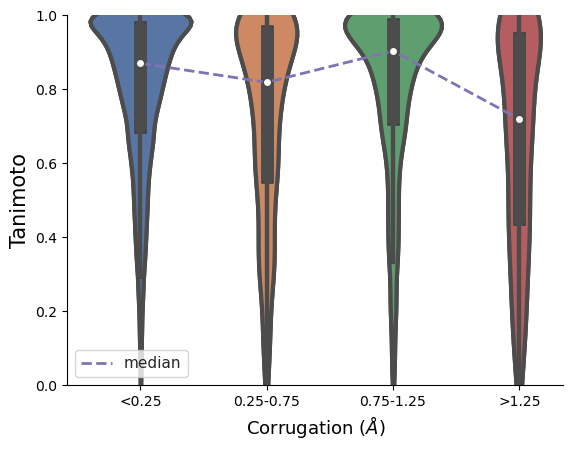

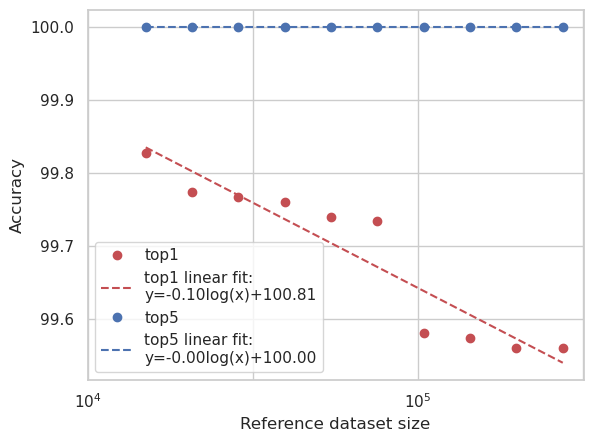

In [40]:

# Calculate linear regression for top 1 accuracy
coef1, interp1 = np.polyfit(np.log(ref_sizes), top_1_acc, 1)
poly1 = np.poly1d(coef1)
x1 = ref_sizes

# Calculate linear regression for top 5 accuracy
coef5, interp5 = np.polyfit(np.log(ref_sizes), top_5_acc, 1)
poly5 = np.poly1d(coef5)
x5 = ref_sizes

# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(x1, np.log(ref_sizes)*coef1+interp1, 'r--')
ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.plot(x5, np.log(ref_sizes)*coef5+interp5, 'b--')
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', f'top1 linear fit:\ny={coef1:.2f}log(x)+{interp1:.2f}', 
            'top5', f'top5 linear fit:\ny={coef5:.2f}log(x)+{interp5:.2f}'])
#ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5])

ax1.set_xticks(x_ticks)
# Display the plot
plt.show()

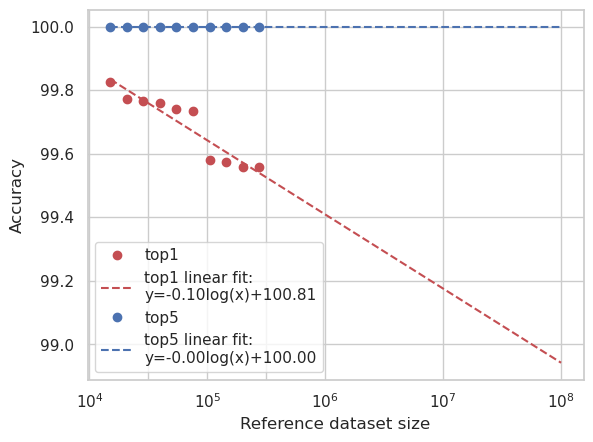

In [41]:
# Calculate linear regression for top 1 accuracy
coef1, interp1 = np.polyfit(np.log(ref_sizes), top_1_acc, 1)
poly1 = np.poly1d(coef1)
x1 = ref_sizes
x1 = np.append(x1, 10**8)
# Calculate linear regression for top 5 accuracy
coef5, interp5 = np.polyfit(np.log(ref_sizes), top_5_acc, 1)
poly5 = np.poly1d(coef5)
x5 = ref_sizes
x5 = np.append(x5, 10**8)
# Create a figure and two subplots
fig, ax1 = plt.subplots()

# Plot the first line on the first axis
ax1.plot(ref_sizes, top_1_acc, 'ro')
ax1.plot(x1, np.log(x1)*coef1+interp1, 'r--')
ax1.plot(ref_sizes, top_5_acc, 'bo')
ax1.plot(x5, np.log(x5)*coef5+interp5, 'b--')
ax1.set_xlabel('Reference dataset size')
ax1.set_ylabel('Accuracy')
ax1.legend(['top1', f'top1 linear fit:\ny={coef1:.2f}log(x)+{interp1:.2f}', 
            'top5', f'top5 linear fit:\ny={coef5:.2f}log(x)+{interp5:.2f}'])
#ax1.set_ylim(90, 100)
ax1.set_xscale('log')
x_ticks = 10**np.asarray([4,4.5, 5, 5.5, 6, 7, 8])

ax1.set_xticks(x_ticks)
# Display the plot
plt.show()

## Tanimoto control vs CNN


In [45]:
pred_fp_arr = pickle.load( open(f"/home/{USER}/CODE/Pytorch-fingerprints/calculations/pred_fp_arr_dropout_0_5_atom_count.gz", "rb"))
samples_df = test_df[:N_SAMPLES]
target_fp_arr = np.asarray(samples_df['morgan_fp'])
target_fp_arr = np.stack(target_fp_arr)
pred_fp_arr = pred_fp_arr[:N_SAMPLES]


# similarity between predicted and ground truth fp
cnn_tan = tanimoto_numpy(pred_fp_arr, target_fp_arr)

# similarity between ground truth fingerprints from randomly drawn molecules
n_samples = len(test_df.dropna())
perm_1 = np.random.RandomState(seed=42).permutation(n_samples)
perm_2 = np.random.RandomState(seed=12).permutation(n_samples)
mask = (perm_1 == perm_2)
m_perm_1 = perm_1[~mask]
m_perm_2 = perm_2[~mask]

fp1 = test_df.iloc[m_perm_1]['morgan_fp']
fp2 = test_df.iloc[m_perm_2]['morgan_fp']
fp1_ar = np.asarray(fp1)
fp2_ar = np.asarray(fp2)
fp1_ar = np.stack(fp1_ar)
fp2_ar = np.stack(fp2_ar)

random_tan = tanimoto_numpy(fp1_ar, fp2_ar)

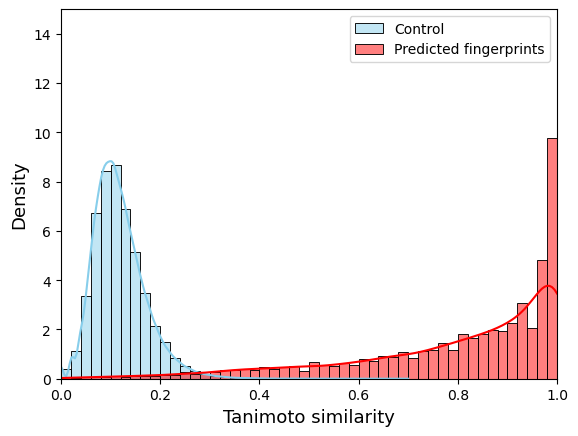

In [46]:
plt.rcParams.update(plt.rcParamsDefault)

sns.histplot(data=random_tan,  color="skyblue", label="Control",
             kde=True, stat='density', binrange=[0,1], binwidth=0.02)
sns.histplot(data=cnn_tan, color="red", label="Predicted fingerprints", 
             kde=True, stat='density', binrange=[0,1],  binwidth=0.02 )
plt.axis([0, 1, 0, 15])
plt.xlabel('Tanimoto similarity', fontsize =13)
plt.ylabel('Density', fontsize =13)
plt.legend() 

#plt.savefig("tanimoto_distributions_dropout_0_5_all_testset.pdf", format="pdf", bbox_inches="tight")
plt.show()

## tanimoto of top1 mistakes

In [28]:
data_path = f'/home/{USER}/CODE/Pytorch-fingerprints/calculations/acc_scaling_law_w_tie_break.pickle'


with open(data_path, 'rb') as handle:
    acc_scaling_law = pickle.load(handle)


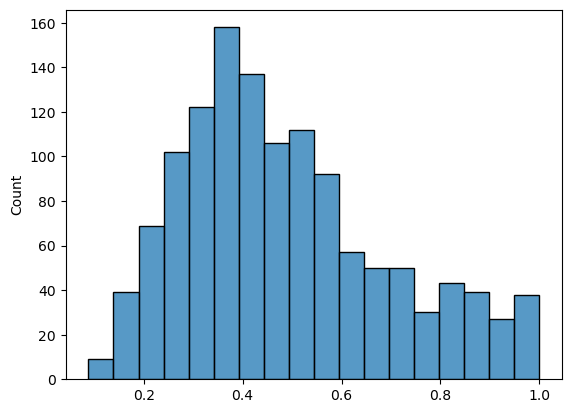

In [51]:
sns.histplot(acc_scaling_law[ref_sizes[0]]['top_1_mistakes_tanimoto'])
plt.show()

In [52]:
acc_scaling_law.keys()

dict_keys([275422, 199327, 144255, 104399, 75555, 54680, 39573, 28639, 20726, 15000])

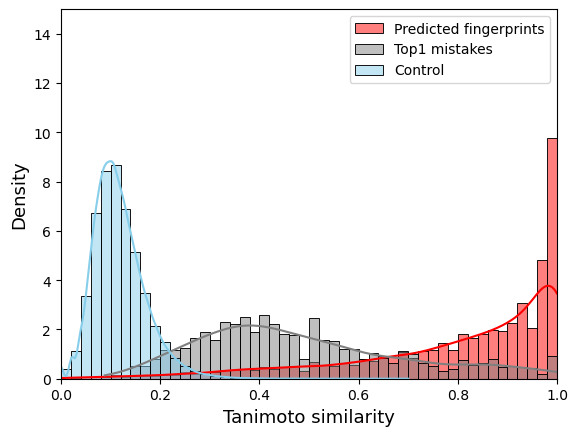

In [53]:
plt.rcParams.update(plt.rcParamsDefault)


sns.histplot(data=cnn_tan, color="red", label="Predicted fingerprints", 
             kde=True, stat='density', binrange=[0,1],  binwidth=0.02 )

sns.histplot(data=acc_scaling_law[275422]['top_1_mistakes_tanimoto'], 
             color="gray", label="Top1 mistakes", 
             kde=True, stat='density', binrange=[0,1],  binwidth=0.02 , alpha=0.5)
sns.histplot(data=random_tan,  color="skyblue", label="Control",
             kde=True, stat='density', binrange=[0,1], binwidth=0.02)
plt.axis([0, 1, 0, 15])
plt.xlabel('Tanimoto similarity', fontsize =13)
plt.ylabel('Density', fontsize =13)
plt.legend() 

#plt.savefig("tanimoto_distributions_dropout_0_5_all_testset.pdf", format="pdf", bbox_inches="tight")
plt.show()

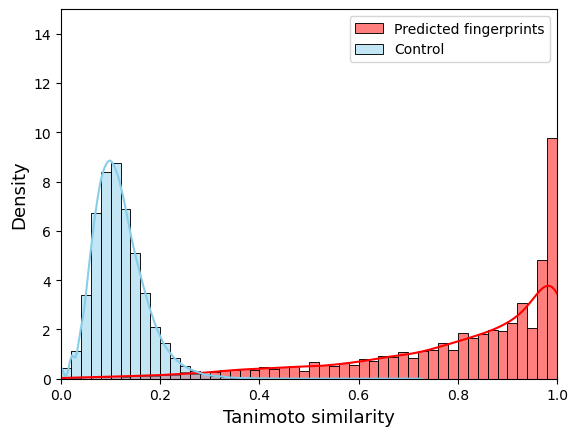

In [63]:
plt.rcParams.update(plt.rcParamsDefault)


sns.histplot(data=cnn_tan, color="red", label="Predicted fingerprints", 
             kde=True, stat='density', binrange=[0,1],  binwidth=0.02 )

#sns.histplot(data=acc_scaling_law[15000]['top_1_mistakes_tanimoto'], 
#             color="gray", label="Top1 mistakes", 
#             kde=True, stat='density', binrange=[0,1],  binwidth=0.02 , alpha=0.5)
sns.histplot(data=random_tan,  color="skyblue", label="Control",
             kde=True, stat='density', binrange=[0,1], binwidth=0.02)
plt.axis([0, 1, 0, 15])
plt.xlabel('Tanimoto similarity', fontsize =13)
plt.ylabel('Density', fontsize =13)
plt.legend() 

##plt.savefig("tanimoto_distributions_dropout_0_5_all_testset.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Check for ties
We are going to look for cases where the fingeprints are predicted well but there is a tie.


In [71]:
top1_mistake_tan = dict(zip(acc_scaling_law[275422]['top_1_mistakes'], acc_scaling_law[275422]['top_1_mistakes_tanimoto']))

top1_mistake_tan = dict(sorted(top1_mistake_tan.items(), key=lambda x: x[1], reverse=True))
top1_mistake_tan

{123044: 1.0,
 59787233: 1.0,
 9163: 1.0,
 123032: 1.0,
 15529: 1.0,
 4350491: 1.0,
 5028843: 1.0,
 223849: 1.0,
 109071812: 1.0,
 132285225: 1.0,
 10855: 1.0,
 123338585: 1.0,
 13792235: 1.0,
 890589: 1.0,
 135178929: 1.0,
 7485: 1.0,
 59450393: 1.0,
 23131417: 1.0,
 135178930: 0.975609756097561,
 135179015: 0.96875,
 23131393: 0.967741935483871,
 155237: 0.9666666666666667,
 638851: 0.9655172413793104,
 12590390: 0.9629629629629629,
 1107281: 0.9615384615384616,
 11955078: 0.9615384615384616,
 137432885: 0.9583333333333334,
 1647589: 0.9583333333333334,
 129671878: 0.9565217391304348,
 53308489: 0.9565217391304348,
 59787227: 0.9523809523809523,
 85986644: 0.95,
 6431039: 0.95,
 67467: 0.95,
 5766631: 0.9473684210526315,
 54427292: 0.9473684210526315,
 59467622: 0.9411764705882353,
 135178914: 0.9393939393939394,
 9142: 0.9333333333333333,
 132204079: 0.9333333333333333,
 12340268: 0.9310344827586207,
 137432867: 0.9310344827586207,
 118895199: 0.9259259259259259,
 118617583: 0.92592

In [81]:
pred_fp_arr.shape

(15000, 1024)

In [91]:
cid_pred_fp =dict(zip(test_df.iloc[:N_SAMPLES]['CID'], pred_fp_arr))


In [118]:


output_df = fp_screening_function(cid_pred_fp[123044], test_df, top_k = 5)
output_df

,path,CID,SMILES,morgan_fp,split,corrugation,corr_cat,tanimoto
146499,/scratch/dataset/quam/K-1/Conformer3D_CID_7080...,7080,C1=CC=C2C=C3C=C4C=CC=CC4=CC3=CC2=C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0007,0,1.000000
20518,/scratch/dataset/quam/K-1/Conformer3D_CID_6857...,6857587,C1=CC=C2C=C3C=C4C=C5C=C6C=C7C=C8C=C9C=CC=CC9=C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0194,0,1.000000
78524,/scratch/dataset/quam/K-1/Conformer3D_CID_5460...,5460712,C1=CC=C2C=C3C=C4C=C5C=C6C=C7C=CC=CC7=CC6=CC5=C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0041,0,1.000000
300,/scratch/dataset/quam/K-1/Conformer3D_CID_1230...,123044,C1=CC=C2C=C3C=C4C=C5C=C6C=CC=CC6=CC5=CC4=CC3=C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0027,0,1.000000
188423,/scratch/dataset/quam/K-1/Conformer3D_CID_1360...,136034,C1=CC=C2C=C3C=C4C(=CC3=CC2=C1)C5=CC6=CC7=CC=CC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0117,0,0.785714


In [139]:
atoms_1 = atom_count_df[atom_count_df['CID']==7080][['C', 'Br', 'Cl', 'F', 'I','N', 'O', 'P', 'S', 'H']].to_numpy()
atoms_2 = atom_count_df[atom_count_df['CID']==6857587][['C', 'Br', 'Cl', 'F', 'I','N', 'O', 'P', 'S', 'H']].to_numpy()
atoms_3 = atom_count_df[atom_count_df['CID']==5460712][['C', 'Br', 'Cl', 'F', 'I','N', 'O', 'P', 'S', 'H']].to_numpy()


print(atoms_1, '\n \n', atoms_2, '\n \n', atoms_3, )

[[18  0  0  0  0  0  0  0  0 12]] 
 
 [[38  0  0  0  0  0  0  0  0 22]] 
 
 [[30  0  0  0  0  0  0  0  0 18]]


In [144]:
pred = atoms_1
print((atoms_3-pred))
(atoms_3-pred)*[1, 3, 3, 3, 3, 3, 3, 3, 3, 0.5]

[[12  0  0  0  0  0  0  0  0  6]]


array([[12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]])

In [145]:
output_df.iloc[:4][['C', 'Br', 'Cl', 'F', 'I','N', 'O', 'P', 'S', 'H']].to_numpy()

KeyError: "None of [Index(['C', 'Br', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S', 'H'], dtype='object')] are in the [columns]"

## Analysis and debugging of results

In [4]:
acc_scaling_law.keys()

dict_keys([275422, 199327, 144255, 104399, 75555, 54680, 39573, 28639, 20726, 15000])

In [5]:
acc_scaling_law[275422]
top_1_mistakes = acc_scaling_law[275422]['top_1_mistakes']
top_1_mistakes_tie = acc_scaling_law[275422]['top_1_mistakes_tie']
top_5_mistakes = acc_scaling_law[275422]['top_5_mistakes']
print(len(top_1_mistakes), len(top_1_mistakes_tie), len(top_5_mistakes))

1280 1227 636


In [6]:
edge_cases =  list(set(top_1_mistakes_tie) - set(top_5_mistakes))

print(len(edge_cases), edge_cases[10:100])

591 [11446312, 123140140, 10285, 21721136, 129812530, 303161, 54519866, 21719102, 53798975, 114754, 11481159, 11804746, 129857610, 89053264, 12413010, 85989461, 11788376, 123908185, 86251611, 6477917, 129087581, 22808670, 130347104, 130312287, 123355235, 123873380, 22976615, 54028393, 23287913, 53635178, 135897203, 130115701, 602238, 123744385, 90245, 5363845, 54493317, 22280331, 450706, 123032, 59330717, 536741, 123551914, 123654315, 132081836, 126501037, 131883183, 53852335, 22716, 129792189, 135829698, 13217988, 10442, 22716619, 21590228, 54118620, 78046, 134854885, 130511077, 12761319, 13134054, 129865963, 358639, 12761330, 123236601, 13758715, 12781822, 135993598, 21954828, 12669197, 51034385, 5384468, 22805, 129853718, 117696794, 123668766, 59898143, 596263, 135082282, 58800428, 129804591, 58800433, 54014259, 13766967, 89526585, 129833273, 13228348, 129712445, 6431039, 53838146]


In [16]:
dataset_df.memory_usage().sum()/(1024**3)

0.03544551134109497

In [4]:

data_path = f'/home/{USER}/CODE/Pytorch-fingerprints/calculations/scaling_law_chemical_formula/acc_scaling_law_top10.pickle'

with open(data_path, 'rb') as handle:
    acc_scaling_law = pickle.load(handle)

In [8]:
acc_scaling_law[275422]['top_5_mistakes']

[59383547,
 59390182,
 101725283,
 60134116,
 138831,
 58830918,
 58830949,
 13000274,
 13000286,
 136762336,
 12761531,
 123911932,
 543014,
 134982501,
 134982825,
 22448215,
 123473743,
 13766965,
 129829073,
 23592500,
 59854140,
 59854142,
 59854147,
 59645563,
 58774645,
 85985737,
 85986644,
 54097614,
 54098412,
 135899568,
 129645177,
 22087375,
 134867626,
 129868456,
 123284874,
 123285067,
 71333029,
 71334116,
 18310,
 183178,
 564910,
 2751855,
 167605,
 167874,
 3446506,
 138373760,
 138373778,
 3015563,
 202170,
 5150855,
 12486823,
 638105,
 12869424,
 129734434,
 12973443,
 13195,
 123452643,
 129629624,
 134941506,
 129655232,
 87377422,
 87400363,
 87402261,
 129892382,
 129713981,
 129719681,
 129720672,
 129729194,
 134668,
 130274105,
 129676958,
 129677181,
 129677204,
 129785483,
 123636985,
 59189580,
 129702993,
 117717368,
 117718062,
 118049675,
 13641172,
 136411974,
 129815416,
 59798983,
 134171690,
 134172284,
 119079614,
 119081992,
 129635281,
 122064

In [12]:
test_df = dataset_df[dataset_df['split'] == 'test']
test_df

,path,CID,SMILES,morgan_fp,split,corrugation,C,Br,Cl,F,I,N,O,P,S,H
1,/scratch/dataset/quam/K-1/Conformer3D_CID_1000...,10001048,C1=CC=C2C=C3C(=CC2=C1)NC(=N3)C4=CC5=C(C=C4)N=C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,1.1767,25.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,16.0
7,/scratch/dataset/quam/K-1/Conformer3D_CID_1000...,10005,C(#N)N=C(N)N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0002,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0
14,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100128716,CC1=C(C2=NC(=CC(=C2C=C1)NCCCN)C)C,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0110,15.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,21.0
15,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100175925,COC(=O)CSC1=NN=C(S1)NC(=O)C2=CC=CO2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0530,10.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,2.0,9.0
16,/scratch/dataset/quam/K-1/Conformer3D_CID_1001...,100197007,COC(=O)CSC1=NN=C(S1)NC(=O)C2=CC3=C(O2)C=CC4=CC...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0856,18.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579897,/scratch/dataset/quam/K-1/Conformer3D_CID_1376...,13762891,C1=CC(=CC=C1C(=O)CCC(=O)C2=CC=C(C=C2)[N+](=O)[...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.1397,16.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,12.0
579900,/scratch/dataset/quam/K-1/Conformer3D_CID_3410...,341027,C1OC2=C(O1)C(=O)C3=C(C2=O)C=CC(=C3)O,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0035,11.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0
579902,/scratch/dataset/quam/K-1/Conformer3D_CID_5392...,53921077,C1=CC(=CC=C1C=N)N,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0008,7.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0
579903,/scratch/dataset/quam/K-1/Conformer3D_CID_8238...,82382131,CC1=C2C=C(NC2=CC=C1)C3=NN=CC(=C3)C(=O)O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test,0.0034,14.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,11.0


In [22]:
cid_corr_error = dict()

for cid in tqdm(acc_scaling_law[275422]['top_5_mistakes']):
    cid_corr_error[cid] = test_df[test_df['CID']==cid]['corrugation'].iloc[0]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 636/636 [00:00<00:00, 2870.97it/s]


In [24]:
cid_corr_error

{59383547: 0.6434999999999995,
 59390182: 0.023899999999999366,
 101725283: 0.0183,
 60134116: 0.0018999999999992,
 138831: 0.00019999999999953388,
 58830918: 0.0009000000000014552,
 58830949: 1.1312999999999995,
 13000274: 0.018800000000000594,
 13000286: 0.008900000000000574,
 136762336: 0.0004999999999988347,
 12761531: 0.0002999999999993008,
 123911932: 0.001300000000000523,
 543014: 0.0006000000000004,
 134982501: 0.0019999999999988916,
 134982825: 0.0034999999999989484,
 22448215: 0.01729999999999876,
 123473743: 0.0040999999999993,
 13766965: 0.5844999999999985,
 129829073: 0.0008000000000016882,
 23592500: 0.4883000000000007,
 59854140: 0.0038000000000000256,
 59854142: 0.0027999999999988034,
 59854147: 0.01159999999999961,
 59645563: 0.7729999999999997,
 58774645: 0.00280000000000058,
 85985737: 0.4021000000000008,
 85986644: 0.5827999999999989,
 54097614: 0.0004999999999988347,
 54098412: 0.015399999999999636,
 135899568: 0.0005999999999986,
 129645177: 0.3637999999999995,
 2

In [25]:
cid_corr_error = sorted(cid_corr_error.items(), key=lambda x:x[1])


In [26]:
cid_corr_error

[(12869424, 0.0),
 (702, 0.0),
 (142039, 0.0),
 (22146387, 0.0),
 (54325307, 0.0),
 (21580073, 0.0),
 (59869631, 0.0),
 (12201684, 0.0),
 (12314535, 0.0),
 (61175, 0.0),
 (134867626, 9.99999999997e-05),
 (54195301, 9.99999999997e-05),
 (53658263, 9.999999999976694e-05),
 (60096125, 9.999999999976694e-05),
 (54173319, 9.999999999976694e-05),
 (429379, 0.00019999999999949995),
 (135082198, 0.0001999999999995),
 (145773, 0.0001999999999995),
 (134483276, 0.0001999999999995),
 (135481969, 0.0001999999999995),
 (243601, 0.0001999999999995),
 (129879730, 0.0001999999999995),
 (54491356, 0.0001999999999995),
 (54263143, 0.0001999999999995),
 (138831, 0.00019999999999953388),
 (69393, 0.00019999999999953388),
 (23549409, 0.00019999999999953388),
 (12226, 0.00019999999999953388),
 (125295946, 0.00019999999999953388),
 (59881796, 0.00019999999999953388),
 (12247338, 0.00019999999999953388),
 (12661, 0.00019999999999953388),
 (136437333, 0.00019999999999953388),
 (17140, 0.00019999999999953388),


In [ ]:
137250137
86114644
129816930
129866873
22382873

### New corrugation figure

In [7]:
#data
data_path = f'/home/{USER}/QUAM-AFM/datasets/285k_train_15k_fp_and_atom_counts_w_H.gz'
dataset_df = pd.read_pickle(data_path)

test_df = dataset_df[dataset_df['split'] == 'test']
N_SAMPLES = 15000

In [3]:
"acc_scaling_law_top10 is where we reorder the top10 based on chemical formula"
data_path = f'/home/{USER}/CODE/Pytorch-fingerprints/calculations/scaling_law_chemical_formula/acc_scaling_law_top10.pickle'

with open(data_path, 'rb') as handle:
    acc_scaling_law = pickle.load(handle)

In [4]:
acc_scaling_law

{275422: {'top_1_mistakes': [129712445,
   59383542,
   59383547,
   59390182,
   100822,
   101725283,
   102393,
   123683583,
   60134116,
   138831,
   58830918,
   58830949,
   13000274,
   13000286,
   123350949,
   136762336,
   12761319,
   12761330,
   12761531,
   85669101,
   123044,
   123908185,
   123911932,
   123912520,
   54300247,
   543014,
   134982501,
   134982825,
   134983592,
   22448215,
   123473743,
   123475825,
   129671794,
   13766956,
   13766965,
   13766967,
   129829073,
   129829432,
   129829435,
   23592500,
   59854140,
   59854142,
   59854147,
   123757801,
   59645563,
   58774645,
   85985737,
   85986644,
   85988850,
   85989461,
   124034542,
   71750269,
   54097614,
   54098412,
   126650924,
   135897203,
   135899568,
   129645177,
   129774538,
   22087375,
   134867626,
   59270990,
   129868456,
   130475637,
   59741931,
   23523247,
   58656424,
   12340268,
   123967434,
   59787205,
   59787225,
   59787227,
   59787233,
   5978

In [8]:
def categorize_corr(corr):
    '''Convert corrugation (float) into a class'''
    corr = float(corr)
    assert (corr >= 0)
    if corr < 0.25:
        cat = 0
    elif corr < 0.75:
        cat = 1
    elif corr < 1.25:
        cat = 2
    else:
        cat = 3
    return cat

In [9]:
test_df['corr_cat'] = [categorize_corr(x) for x in test_df['corrugation']]
Counter(test_df['corr_cat'])

Counter({2: 49157, 0: 203887, 1: 12175, 3: 14629})

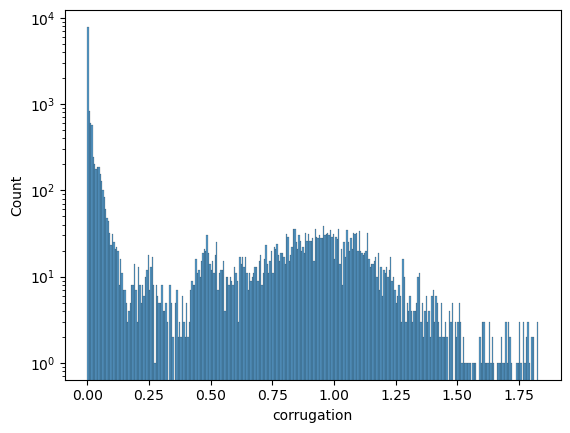

In [10]:
data = test_df[:N_SAMPLES]['corrugation']
# Create histogram plot
ax = sns.histplot(data, kde=False)

# Set log scale for y-axis
ax.set_yscale('log')

# Show the plot
plt.show()

In [11]:
corr_cat_counter = Counter(test_df['corr_cat'][:N_SAMPLES])
corr_cat_counter

Counter({2: 1996, 0: 11796, 1: 922, 3: 286})

In [13]:
ref_sizes = list(acc_scaling_law.keys())
print(ref_sizes)

[275422, 199327, 144255, 104399, 75555, 54680, 39573, 28639, 20726, 15000]


In [14]:
acc_scaling_law[np.max(ref_sizes)].keys()

dict_keys(['top_1_mistakes', 'top_5_mistakes', 'top_1_mistakes_reorder', 'top_5_mistakes_reorder'])

In [15]:
def top_acc_corr_cat(samples_df, top_1_mistakes, top_1_mistakes_reorder, top_5_mistakes, top_5_mistakes_reorder):
    '''Compute the top1 and top5 accuracy segregating by corr_cat
    ARGS:
            samples_df: dictonary contianing the CID and corrugation category of the
                        molecules for which identification is performed.
            top_{1,5}_mistakes: list of CID where the reference was not in the top {1,5} candidates'''
    
    corr_cat_top1 = list()
    corr_cat_top1_reorder = list()
    corr_cat_top5 = list()
    corr_cat_top5_reorder = list()
    for CID in top_1_mistakes:
        corr_cat_top1.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
    
    for CID in top_1_mistakes_reorder:
        corr_cat_top1_reorder.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
    
    for CID in top_5_mistakes:
        corr_cat_top5.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
        
    for CID in top_5_mistakes_reorder:
        corr_cat_top5_reorder.append(int(samples_df[samples_df['CID'] == CID]['corr_cat']))
        
    count_top1 = Counter(corr_cat_top1)
    count_top1_reorder = Counter(corr_cat_top1_reorder)
    count_top5 = Counter(corr_cat_top5)
    count_top5_reorder = Counter(corr_cat_top5_reorder)
    
    corr_cat_counter = Counter(samples_df['corr_cat']) #total number of samples corresponding to each category
    
    top_1_acc = dict()
    top_1_acc_reorder = dict()
    top_5_acc = dict() 
    top_5_acc_reorder = dict()

    for key in corr_cat_counter.keys():
        top_1_acc[key] = (1-count_top1[key]/corr_cat_counter[key])*100
        top_1_acc_reorder[key] = (1-count_top1_reorder[key]/corr_cat_counter[key])*100
        top_5_acc[key] = (1-count_top5[key]/corr_cat_counter[key])*100
        top_5_acc_reorder[key] = (1-count_top5_reorder[key]/corr_cat_counter[key])*100
    top_1_acc = {k: v for k, v in sorted(top_1_acc.items())}
    top_1_acc_reorder = {k: v for k, v in sorted(top_1_acc_reorder.items())}
    top_5_acc = {k: v for k, v in sorted(top_5_acc.items())}
    top_5_acc_reorder = {k: v for k, v in sorted(top_5_acc_reorder.items())}

    return top_1_acc, top_1_acc_reorder, top_5_acc, top_5_acc_reorder

In [16]:
data_path = f'/home/{USER}/CODE/Pytorch-fingerprints/calculations/scaling_law_chemical_formula/acc_scaling_law_top10.pickle'

with open(data_path, 'rb') as handle:
    acc_scaling_law = pickle.load(handle)
acc_scaling_law[275422].keys()

dict_keys(['top_1_mistakes', 'top_5_mistakes', 'top_1_mistakes_reorder', 'top_5_mistakes_reorder'])

In [127]:
top_1_mistakes =  acc_scaling_law[np.max(ref_sizes)]['top_1_mistakes']
top_1_mistakes_reorder =  acc_scaling_law[np.max(ref_sizes)]['top_1_mistakes_reorder']
top_5_mistakes =  acc_scaling_law[np.max(ref_sizes)]['top_5_mistakes']
top_5_mistakes_reorder =  acc_scaling_law[np.max(ref_sizes)]['top_5_mistakes_reorder']


In [128]:
top_1_acc, top_1_acc_reorder, top_5_acc, top_5_acc_reorder = top_acc_corr_cat(test_df[:N_SAMPLES], 
                                                                      top_1_mistakes, top_1_mistakes_reorder, 
                                                                      top_5_mistakes, top_5_mistakes_reorder)
print(top_1_acc, top_1_acc_reorder, top_5_acc, top_5_acc_reorder)

{0: 93.0061037639878, 1: 81.99566160520607, 2: 89.67935871743487, 3: 70.97902097902097} {0: 96.4479484571041, 1: 89.587852494577, 2: 92.63527054108216, 3: 73.77622377622377} {0: 96.92268565615463, 1: 90.3470715835141, 2: 93.8376753507014, 3: 78.67132867132867} {0: 97.558494404883, 1: 91.97396963123644, 2: 94.73947895791584, 3: 80.76923076923077}


    Corrugation               Accuracy     value
0             0               top1 acc  0.930061
1             1               top1 acc  0.819957
2             2               top1 acc  0.896794
3             3               top1 acc  0.709790
4             0  top1 acc chem formula  0.964479
5             1  top1 acc chem formula  0.895879
6             2  top1 acc chem formula  0.926353
7             3  top1 acc chem formula  0.737762
8             0               top5 acc  0.969227
9             1               top5 acc  0.903471
10            2               top5 acc  0.938377
11            3               top5 acc  0.786713
12            0  top5 acc chem formula  0.975585
13            1  top5 acc chem formula  0.919740
14            2  top5 acc chem formula  0.947395
15            3  top5 acc chem formula  0.807692


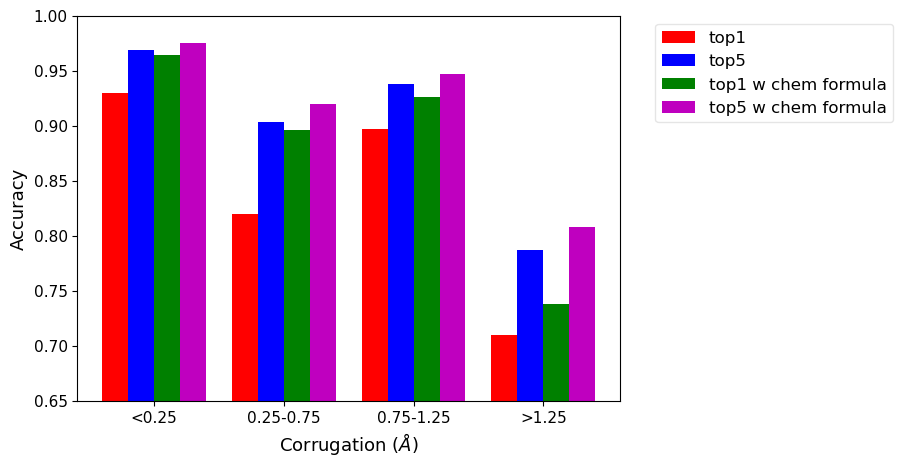

In [129]:
# Melt the dataframe to show top1 acc, top1 acc chem formula, top5 acc and top5 acc chem formula in the same column
data = {'Corrugation': list(top_1_acc.keys()), 'top1 acc': list(top_1_acc.values()),
        'top1 acc chem formula': list(top_1_acc_reorder.values()), 'top5 acc': list(top_5_acc.values()), 
       'top5 acc chem formula': list(top_5_acc_reorder.values()),}
df = pd.DataFrame(data)

df = pd.melt(df, id_vars=['Corrugation'], value_vars=['top1 acc', 'top1 acc chem formula', 'top5 acc', 'top5 acc chem formula'], var_name='Accuracy')
df['value'] = df['value']/100 

# Separate dataframes for 'top1 acc', 'top1 acc chem formula', 'top5 acc' and 'top5 acc chem formula'
df_top1 = df[df['Accuracy'] == 'top1 acc']
df_top1_formula = df[df['Accuracy'] == 'top1 acc chem formula']
df_top5 = df[df['Accuracy'] == 'top5 acc']
df_top5_formula = df[df['Accuracy'] == 'top5 acc chem formula']

# Plot the bar plot
fig, ax = plt.subplots(figsize=(7,5))
width = 0.2  # width of the bars

bar1 = ax.bar(df_top1['Corrugation']-width, df_top1['value'], width, label='top1', color='r', capsize=5)
bar2 = ax.bar(df_top5['Corrugation'] , df_top5['value'], width, label='top5', color='b', capsize=5)
bar3 = ax.bar(df_top1_formula['Corrugation'] + width, df_top1_formula['value'], width, label='top1 w chem formula', color='g', capsize=5)
bar4 = ax.bar(df_top5_formula['Corrugation'] + 2*width, df_top5_formula['value'], width, label='top5 w chem formula', color='m', capsize=5)

ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_ylim(0.65, 1)
ax.set_xticks(df_top1['Corrugation'] + width / 2)
ax.set_xticklabels(['<0.25', '0.25-0.75', '0.75-1.25', '>1.25'])

ax.legend(fontsize=12, framealpha=0.5,fancybox=True, bbox_to_anchor=(1.05, 1.0))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
# Display the plot
print(df)
##plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_reorder_chem_corrugation_legend_outside.pdf', format="pdf", bbox_inches="tight")

plt.show()

In [140]:

# Melt the dataframe to show top1 acc, top1 acc chem formula, top5 acc and top5 acc chem formula in the same column
data = {'Corrugation': [r'$<0.25\,\AA$', r'$0.25-0.75\,\AA$', r'$0.75-1.25\,\AA$', r'$>1.25\,\AA$'], 'top1 acc': list(top_1_acc.values()),
        'top1 acc chem formula': list(top_1_acc_reorder.values()), 'top5 acc': list(top_5_acc.values()), 
       'top5 acc chem formula': list(top_5_acc_reorder.values()),}
df = pd.DataFrame(data)
df

,Corrugation,top1 acc,top1 acc chem formula,top5 acc,top5 acc chem formula
0,"$<0.25\,\AA$",93.006104,96.447948,96.922686,97.558494
1,"$0.25-0.75\,\AA$",81.995662,89.587852,90.347072,91.973970
2,"$0.75-1.25\,\AA$",89.679359,92.635271,93.837675,94.739479
3,"$>1.25\,\AA$",70.979021,73.776224,78.671329,80.769231


In [141]:
data['Corrugation']

['$<0.25\\,\\AA$',
 '$0.25-0.75\\,\\AA$',
 '$0.75-1.25\\,\\AA$',
 '$>1.25\\,\\AA$']

$<0.25\,\AA$
[93.0061037639878, 96.4479484571041, 96.92268565615463, 97.558494404883]
$0.25-0.75\,\AA$
[81.99566160520607, 89.587852494577, 90.3470715835141, 91.97396963123644]
$0.75-1.25\,\AA$
[89.67935871743487, 92.63527054108216, 93.8376753507014, 94.73947895791584]
$>1.25\,\AA$
[70.97902097902097, 73.77622377622377, 78.67132867132867, 80.76923076923077]
        Corrugation   top1 acc  top1 acc chem formula   top5 acc  \
0      $<0.25\,\AA$  93.006104              96.447948  96.922686   
1  $0.25-0.75\,\AA$  81.995662              89.587852  90.347072   
2  $0.75-1.25\,\AA$  89.679359              92.635271  93.837675   
3      $>1.25\,\AA$  70.979021              73.776224  78.671329   

   top5 acc chem formula  
0              97.558494  
1              91.973970  
2              94.739479  
3              80.769231  


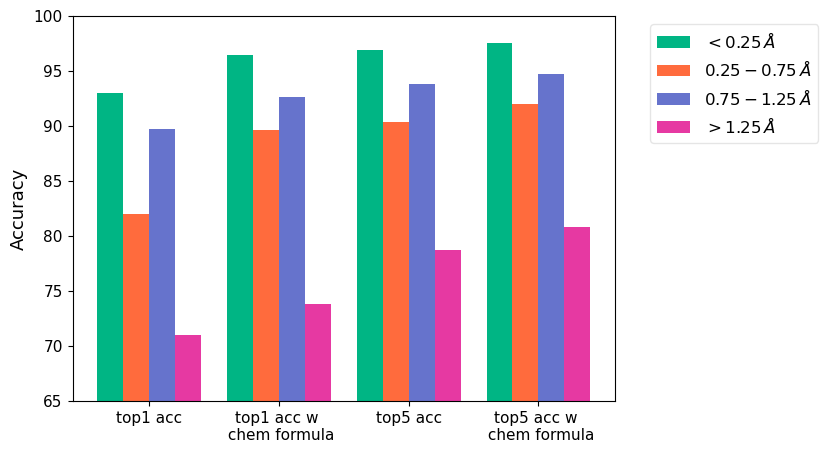

In [142]:
fig, ax = plt.subplots(figsize=(7,5))
width = 0.2  # width of the bars
distance_list = np.arange(4)
color_list = ['#00b584', '#ff6b3d', '#6673cc', '#e639a2']
for i in distance_list:
    corrugation = data['Corrugation'][i]
    acc_list = [data['top1 acc'][i], data['top1 acc chem formula'][i], 
                data['top5 acc'][i], data['top5 acc chem formula'][i]]
    print(corrugation)
    print(acc_list)
    bar1 = ax.bar(distance_list+(i-1)*width, acc_list, width, label=corrugation, color=color_list[i], capsize=5)
#bar2 = ax.bar(distance_list , df_top5['value'], width, label='top5', color='b', capsize=5)
#bar3 = ax.bar(distance_list + width, df_top1_formula['value'], width, label='top1 w chem formula', color='g', capsize=5)
#bar4 = ax.bar(distance_list + 2*width, df_top5_formula['value'], width, label='top5 w chem formula', color='m', capsize=5)

#ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_ylim(65, 100)
ax.set_xticks(distance_list + width / 2)
ax.set_xticklabels(['top1 acc', 'top1 acc w \n chem formula', 'top5 acc', 'top5 acc w \n chem formula'])

ax.legend(fontsize=12, framealpha=0.5,fancybox=True, bbox_to_anchor=(1.05, 1.0))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
# Display the plot
print(df)
##plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_reorder_chem_corrugation_legend_outside.pdf', format="pdf", bbox_inches="tight")

plt.show()

In [143]:
def top_acc_w_tie(acc_scaling_law, n_samples):
    '''Extracts reference dataset sizes and computes top1, top1_w_tiebreak and top5 acc
    from acc_scaling_law dict.
    ARGS: acc_scaling_law: dictionary containing the CID for which the identification fails
          n_samples: number of samples to identify'''
    ref_sizes = list(acc_scaling_law.keys())
    top_1_acc = np.zeros(len(ref_sizes))
    top_1_acc_reorder = np.zeros(len(ref_sizes))
    top_5_acc = np.zeros(len(ref_sizes))
    top_5_acc_reorder = np.zeros(len(ref_sizes))
    
    for i, ref_size in enumerate(ref_sizes):
        top_1_acc[i] =  len(acc_scaling_law[ref_size]['top_1_mistakes'])
        top_1_acc_reorder[i] =  len(acc_scaling_law[ref_size]['top_1_mistakes_reorder'])
        top_5_acc[i] =  len(acc_scaling_law[ref_size]['top_5_mistakes'])
        top_5_acc_reorder[i] =  len(acc_scaling_law[ref_size]['top_5_mistakes_reorder'])

    
    top_1_acc = (1 - top_1_acc/n_samples)*100
    top_1_acc_reorder = (1 - top_1_acc_reorder/n_samples)*100
    top_5_acc = (1 - top_5_acc/n_samples)*100
    top_5_acc_reorder = (1 - top_5_acc_reorder/n_samples)*100

    return ref_sizes, top_1_acc, top_1_acc_reorder, top_5_acc, top_5_acc_reorder

In [144]:
ref_sizes, top_1_acc, top_1_acc_reorder, top_5_acc, top_5_acc_reorder =  top_acc_w_tie(acc_scaling_law, N_SAMPLES)
print(ref_sizes, '\n',
      top_1_acc, '\n',
      top_1_acc_reorder, '\n',
      top_5_acc, '\n',
      top_5_acc_reorder, '\n',
     )

indices = ['top1', 'top1 w chemical', 'top5', 'top5 w chemical']
accuracies = [top_1_acc[0], top_1_acc_reorder[0], top_5_acc[0], top_5_acc_reorder[0]]

# Create a DataFrame with the indices
accuracies_df = pd.DataFrame({'labels': indices,
                             'acc': accuracies})

# Print the DataFrame
print(accuracies_df)

[275422, 199327, 144255, 104399, 75555, 54680, 39573, 28639, 20726, 15000] 
 [91.46666667 91.52       91.67333333 91.83333333 92.58666667 93.12666667
 93.68       94.05333333 94.4        94.82      ] 
 [95.08666667 95.18       95.25333333 95.46       95.92666667 96.27333333
 96.46       96.63333333 96.94666667 97.28      ] 
 [95.76       95.79333333 95.88666667 96.02       96.48       96.74666667
 96.94       97.1        97.28       97.5       ] 
 [96.52       96.64       96.75333333 96.88666667 97.14666667 97.32666667
 97.48666667 97.64       97.86       98.1       ] 

            labels        acc
0             top1  91.466667
1  top1 w chemical  95.086667
2             top5  95.760000
3  top5 w chemical  96.520000


$<0.25\,\AA$
[93.0061037639878, 96.4479484571041, 96.92268565615463, 97.558494404883]
$0.25-0.75\,\AA$
[81.99566160520607, 89.587852494577, 90.3470715835141, 91.97396963123644]
$0.75-1.25\,\AA$
[89.67935871743487, 92.63527054108216, 93.8376753507014, 94.73947895791584]
$>1.25\,\AA$
[70.97902097902097, 73.77622377622377, 78.67132867132867, 80.76923076923077]
        Corrugation   top1 acc  top1 acc chem formula   top5 acc  \
0      $<0.25\,\AA$  93.006104              96.447948  96.922686   
1  $0.25-0.75\,\AA$  81.995662              89.587852  90.347072   
2  $0.75-1.25\,\AA$  89.679359              92.635271  93.837675   
3      $>1.25\,\AA$  70.979021              73.776224  78.671329   

   top5 acc chem formula  
0              97.558494  
1              91.973970  
2              94.739479  
3              80.769231  


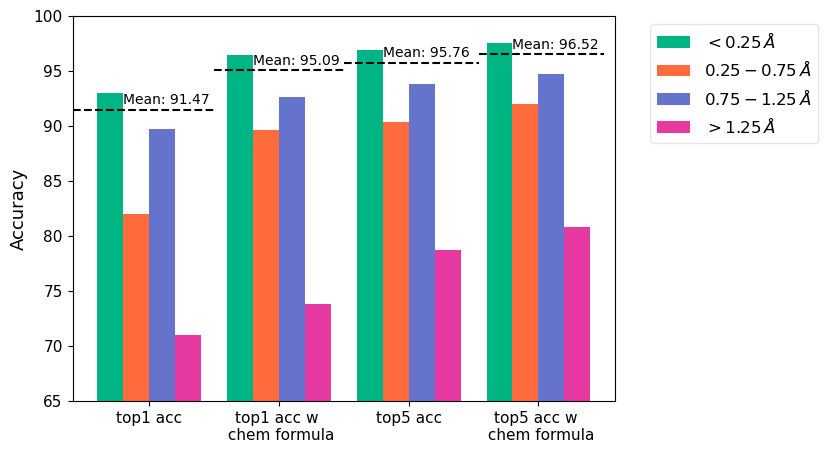

In [145]:
fig, ax = plt.subplots(figsize=(7,5))
width = 0.2  # width of the bars
distance_list = np.arange(4)
color_list = ['#00b584', '#ff6b3d', '#6673cc', '#e639a2']
for i in distance_list:
    corrugation = data['Corrugation'][i]
    acc_list = [data['top1 acc'][i], data['top1 acc chem formula'][i], 
                data['top5 acc'][i], data['top5 acc chem formula'][i]]
    print(corrugation)
    print(acc_list)
    bar1 = ax.bar(distance_list+(i-1)*width, acc_list, width, label=corrugation, color=color_list[i], capsize=5)
#bar2 = ax.bar(distance_list , df_top5['value'], width, label='top5', color='b', capsize=5)
#bar3 = ax.bar(distance_list + width, df_top1_formula['value'], width, label='top1 w chem formula', color='g', capsize=5)
#bar4 = ax.bar(distance_list + 2*width, df_top5_formula['value'], width, label='top5 w chem formula', color='m', capsize=5)

#ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_ylim(65, 100)
ax.set_xticks(distance_list + width / 2)
ax.set_xticklabels(['top1 acc', 'top1 acc w \n chem formula', 'top5 acc', 'top5 acc w \n chem formula'])

ax.legend(fontsize=12, framealpha=0.5,fancybox=True, bbox_to_anchor=(1.05, 1.0))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
# Display the plot
print(df)
##plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_reorder_chem_corrugation_legend_outside.pdf', format="pdf", bbox_inches="tight")

# Calculate the mean for each accuracy type
mean_top1_acc = accuracies_df['acc'].iloc[0]
mean_top1_acc_formula = accuracies_df['acc'].iloc[1]
mean_top5_acc = accuracies_df['acc'].iloc[2]
mean_top5_acc_formula = accuracies_df['acc'].iloc[3]



# Draw horizontal lines for the mean values
ax.axhline(mean_top1_acc, color='k', linestyle='--', xmin=0, xmax=0.26) # Limiting line length for clarity
ax.axhline(mean_top1_acc_formula, color='k', linestyle='--', xmin=0.26, xmax=0.50)
ax.axhline(mean_top5_acc, color='k', linestyle='--', xmin=0.50,xmax=0.75)
ax.axhline(mean_top5_acc_formula, color='k', linestyle='--',  xmin=0.75, xmax=0.98)

# If you want to add labels to the mean lines:
ax.text(0-0.10, mean_top1_acc + 0.5, f'Mean: {mean_top1_acc:.2f}', color='k')
ax.text(1-0.10, mean_top1_acc_formula + 0.5, f'Mean: {mean_top1_acc_formula:.2f}', color='k')
ax.text(2-0.10, mean_top5_acc + 0.5, f'Mean: {mean_top5_acc:.2f}', color='k')
ax.text(3-0.10, mean_top5_acc_formula + 0.5, f'Mean: {mean_top5_acc_formula:.2f}', color='k')

# y-positions for the horizontal lines
y_positions = [mean_top1_acc, mean_top1_acc_formula, mean_top5_acc, mean_top5_acc_formula]




# Draw horizontal lines for the mean values
ax.axvline(1.1, color='k', linestyle='--', ymin=mean_top1_acc, ymax=mean_top1_acc_formula) # Limiting line length for clarity
ax.axvline(0.5, color='k', linestyle='--', ymin=mean_top1_acc_formula, ymax=mean_top1_acc_formula)
ax.axvline(0.75, color='k', linestyle='--', ymin=mean_top1_acc_formula,ymax=mean_top5_acc)




plt.show()
plt.close()

$<0.25\,\AA$
[93.0061037639878, 96.4479484571041, 96.92268565615463, 97.558494404883]
$0.25-0.75\,\AA$
[81.99566160520607, 89.587852494577, 90.3470715835141, 91.97396963123644]
$0.75-1.25\,\AA$
[89.67935871743487, 92.63527054108216, 93.8376753507014, 94.73947895791584]
$>1.25\,\AA$
[70.97902097902097, 73.77622377622377, 78.67132867132867, 80.76923076923077]
        Corrugation   top1 acc  top1 acc chem formula   top5 acc  \
0      $<0.25\,\AA$  93.006104              96.447948  96.922686   
1  $0.25-0.75\,\AA$  81.995662              89.587852  90.347072   
2  $0.75-1.25\,\AA$  89.679359              92.635271  93.837675   
3      $>1.25\,\AA$  70.979021              73.776224  78.671329   

   top5 acc chem formula  
0              97.558494  
1              91.973970  
2              94.739479  
3              80.769231  


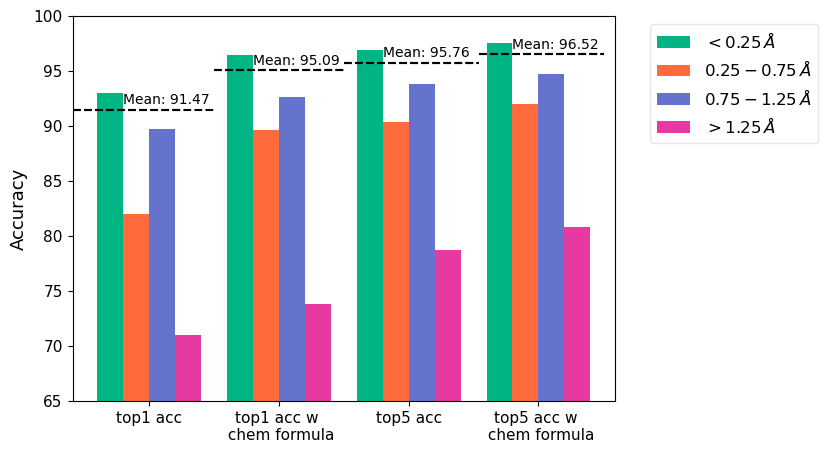

In [146]:
fig, ax = plt.subplots(figsize=(7,5))
width = 0.2  # width of the bars
distance_list = np.arange(4)
color_list = ['#00b584', '#ff6b3d', '#6673cc', '#e639a2']
for i in distance_list:
    corrugation = data['Corrugation'][i]
    acc_list = [data['top1 acc'][i], data['top1 acc chem formula'][i], 
                data['top5 acc'][i], data['top5 acc chem formula'][i]]
    print(corrugation)
    print(acc_list)
    bar1 = ax.bar(distance_list+(i-1)*width, acc_list, width, label=corrugation, color=color_list[i], capsize=5)
#bar2 = ax.bar(distance_list , df_top5['value'], width, label='top5', color='b', capsize=5)
#bar3 = ax.bar(distance_list + width, df_top1_formula['value'], width, label='top1 w chem formula', color='g', capsize=5)
#bar4 = ax.bar(distance_list + 2*width, df_top5_formula['value'], width, label='top5 w chem formula', color='m', capsize=5)

#ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_ylim(65, 100)
ax.set_xticks(distance_list + width / 2)
ax.set_xticklabels(['top1 acc', 'top1 acc w \n chem formula', 'top5 acc', 'top5 acc w \n chem formula'])

ax.legend(fontsize=12, framealpha=0.5,fancybox=True, bbox_to_anchor=(1.05, 1.0))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
# Display the plot
print(df)
##plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_reorder_chem_corrugation_legend_outside.pdf', format="pdf", bbox_inches="tight")

# Calculate the mean for each accuracy type
mean_top1_acc = accuracies_df['acc'].iloc[0]
mean_top1_acc_formula = accuracies_df['acc'].iloc[1]
mean_top5_acc = accuracies_df['acc'].iloc[2]
mean_top5_acc_formula = accuracies_df['acc'].iloc[3]



# Draw horizontal lines for the mean values
ax.axhline(mean_top1_acc, color='k', linestyle='--', xmin=0, xmax=0.26) # Limiting line length for clarity
ax.axhline(mean_top1_acc_formula, color='k', linestyle='--', xmin=0.26, xmax=0.50)
ax.axhline(mean_top5_acc, color='k', linestyle='--', xmin=0.50,xmax=0.75)
ax.axhline(mean_top5_acc_formula, color='k', linestyle='--',  xmin=0.75, xmax=0.98)

# If you want to add labels to the mean lines:
ax.text(0-0.10, mean_top1_acc + 0.5, f'Mean: {mean_top1_acc:.2f}', color='k')
ax.text(1-0.10, mean_top1_acc_formula + 0.5, f'Mean: {mean_top1_acc_formula:.2f}', color='k')
ax.text(2-0.10, mean_top5_acc + 0.5, f'Mean: {mean_top5_acc:.2f}', color='k')
ax.text(3-0.10, mean_top5_acc_formula + 0.5, f'Mean: {mean_top5_acc_formula:.2f}', color='k')

# x-position bounds for the horizontal lines
x_positions = [(0, 0.20), (0.26, 0.50), (0.50, 0.75), (0.75, 0.98)]
y_positions_old = [mean_top1_acc, mean_top1_acc_formula, mean_top5_acc]

y_positions_new = [mean_top1_acc_formula, mean_top5_acc, mean_top5_acc_formula]

# Draw horizontal lines
hor_lines = [
    ax.axhline(y, color='k', linestyle='--', xmin=xmin, xmax=xmax)
    for y, (xmin, xmax) in zip(y_positions, x_positions)
]
plt.show()
plt.close()


$<0.25\,\AA$
[93.0061037639878, 96.4479484571041, 96.92268565615463, 97.558494404883]
$0.25-0.75\,\AA$
[81.99566160520607, 89.587852494577, 90.3470715835141, 91.97396963123644]
$0.75-1.25\,\AA$
[89.67935871743487, 92.63527054108216, 93.8376753507014, 94.73947895791584]
$>1.25\,\AA$
[70.97902097902097, 73.77622377622377, 78.67132867132867, 80.76923076923077]
        Corrugation   top1 acc  top1 acc chem formula   top5 acc  \
0      $<0.25\,\AA$  93.006104              96.447948  96.922686   
1  $0.25-0.75\,\AA$  81.995662              89.587852  90.347072   
2  $0.75-1.25\,\AA$  89.679359              92.635271  93.837675   
3      $>1.25\,\AA$  70.979021              73.776224  78.671329   

   top5 acc chem formula  
0              97.558494  
1              91.973970  
2              94.739479  
3              80.769231  


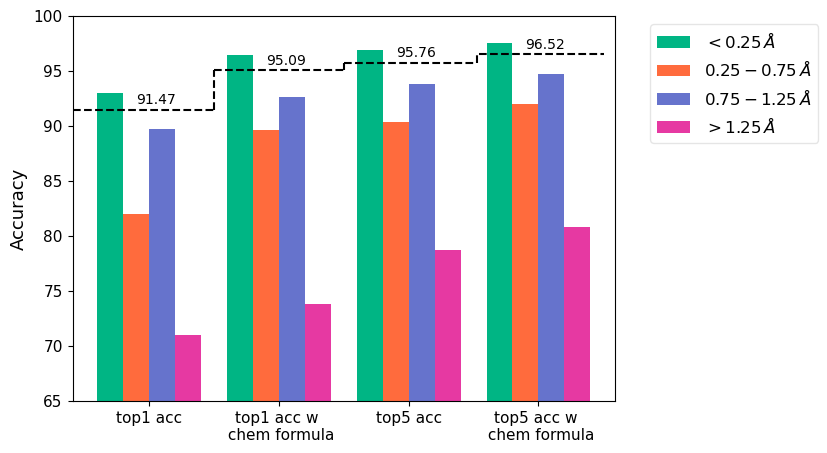

In [154]:
fig, ax = plt.subplots(figsize=(7,5))
width = 0.2  # width of the bars
distance_list = np.arange(4)
color_list = ['#00b584', '#ff6b3d', '#6673cc', '#e639a2']
for i in distance_list:
    corrugation = data['Corrugation'][i]
    acc_list = [data['top1 acc'][i], data['top1 acc chem formula'][i], 
                data['top5 acc'][i], data['top5 acc chem formula'][i]]
    print(corrugation)
    print(acc_list)
    bar1 = ax.bar(distance_list+(i-1)*width, acc_list, width, label=corrugation, color=color_list[i], capsize=5)
#bar2 = ax.bar(distance_list , df_top5['value'], width, label='top5', color='b', capsize=5)
#bar3 = ax.bar(distance_list + width, df_top1_formula['value'], width, label='top1 w chem formula', color='g', capsize=5)
#bar4 = ax.bar(distance_list + 2*width, df_top5_formula['value'], width, label='top5 w chem formula', color='m', capsize=5)

#ax.set_xlabel('Corrugation ($\AA$)', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
ax.set_ylim(65, 100)
ax.set_xticks(distance_list + width / 2)
ax.set_xticklabels(['top1 acc', 'top1 acc w \n chem formula', 'top5 acc', 'top5 acc w \n chem formula'])

ax.legend(fontsize=12, framealpha=0.5,fancybox=True, bbox_to_anchor=(1.05, 1.0))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
# Display the plot
print(df)
##plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/top1_and_5_reorder_chem_corrugation_legend_outside.pdf', format="pdf", bbox_inches="tight")

# Calculate the mean for each accuracy type
mean_top1_acc = accuracies_df['acc'].iloc[0]
mean_top1_acc_formula = accuracies_df['acc'].iloc[1]
mean_top5_acc = accuracies_df['acc'].iloc[2]
mean_top5_acc_formula = accuracies_df['acc'].iloc[3]



## Draw horizontal lines for the mean values
#ax.axhline(mean_top1_acc, color='k', linestyle='--', xmin=0, xmax=0.26) # Limiting line length for clarity
#ax.axhline(mean_top1_acc_formula, color='k', linestyle='--', xmin=0.26, xmax=0.50)
#ax.axhline(mean_top5_acc, color='k', linestyle='--', xmin=0.50,xmax=0.74)
#ax.axhline(mean_top5_acc_formula, color='k', linestyle='--',  xmin=0.74, xmax=0.98)

# If you want to add labels to the mean lines:
ax.text(0, mean_top1_acc + 0.5, f'{mean_top1_acc:.2f}', color='k')
ax.text(1, mean_top1_acc_formula + 0.5, f'{mean_top1_acc_formula:.2f}', color='k')
ax.text(2, mean_top5_acc + 0.5, f'{mean_top5_acc:.2f}', color='k')
ax.text(3, mean_top5_acc_formula + 0.5, f'{mean_top5_acc_formula:.2f}', color='k')

# x-position bounds for the horizontal lines
x_positions = [(0, 0.26), (0.26, 0.50), (0.50, 0.74), (0.75, 0.98)]
y_positions_old = [mean_top1_acc, mean_top1_acc_formula, mean_top5_acc]

y_positions_new = [mean_top1_acc_formula, mean_top5_acc, mean_top5_acc_formula]

# Draw horizontal lines
hor_lines = [
    ax.axhline(y, color='k', linestyle='--', xmin=xmin, xmax=xmax)
    for y, (xmin, xmax) in zip(y_positions, x_positions)
]
# List to capture the x-coordinates of vertical lines
vertical_x_positions = []

# Get the positions of bars and calculate vertical lines' x-coordinates
for i in range(len(distance_list) - 1):
    right_edge_current_bar = distance_list[i] + width
    left_edge_next_bar = distance_list[i + 1]
    
    # Midpoint between two bars
    midpoint = (right_edge_current_bar + left_edge_next_bar) / 2
    vertical_x_positions.append(midpoint)

# List to capture the x-coordinates of vertical lines
vertical_x_positions = []

# Get the positions of bars and calculate vertical lines' x-coordinates
for i in range(len(distance_list) - 1):
    right_edge_current_bar = distance_list[i] + width
    left_edge_next_bar = distance_list[i + 1]
    
    # Midpoint between two bars
    midpoint = (right_edge_current_bar + left_edge_next_bar) / 2
    vertical_x_positions.append(midpoint)

# For each calculated x-coordinate, draw the vertical connecting line
for idx, x_intersection in enumerate(vertical_x_positions):
    # y-coordinates of the two intersecting horizontal lines
    y_start = hor_lines[idx].get_ydata()[0]
    y_end = hor_lines[idx + 1].get_ydata()[0]

    # Calculate ymin and ymax as fractions of the y-axis
    ymin_fraction = (y_start - ax.get_ylim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])
    ymax_fraction = (y_end - ax.get_ylim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])

    # Draw the vertical connecting line
    if idx == 2:
        ax.axvline(x=x_intersection+0.03, ymin=ymin_fraction, ymax=ymax_fraction, color='k', linestyle='--')
    else:
        ax.axvline(x=x_intersection, ymin=ymin_fraction, ymax=ymax_fraction, color='k', linestyle='--')



plt.savefig(f'/home/{USER}/CODE/Pytorch-fingerprints/figures/accuracy_corrugation_reframing_mean.pdf', format="pdf", bbox_inches="tight")


plt.show()
plt.close()
